In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import numpy as np

In [2]:
data = pd.read_csv("data/data_prepared.csv.gz", compression = "gzip")
data = data.fillna(0)

In [3]:
original = pd.read_csv("data/heap_data.csv")

In [4]:
not_reach = data[data.reached == 0].session_id.unique()
reach = data[data.reached == 1].session_id.unique()

In [7]:
total = len(not_reach)+len(reach)
len(reach)/total

0.35394842270825294

In [8]:
total

33697

### last event for not finished application

In [10]:
last_events = original[original.SESSION_ID.isin(not_reach)][['SESSION_ID','EVENT_NAME']].groupby("SESSION_ID").agg('last')
last_events.reset_index(drop = True).EVENT_NAME.value_counts()/len(last_events)

ipq_application_prequalification__pageview_prequalification                                            0.272118
prequalification_page_prequalification_results___prequalification_results                              0.268718
ipq_results_prequalification_results___prequalification_results_click_loan_amounts_and_fees            0.086174
ipq_application_prequalification___prequalification_change_employer_phone_number                       0.083739
ipq_application_prequalification___prequalification_change_contact_details                             0.044373
ipq_application_prequalification___prequalification_change_phone_number                                0.032338
ipq_application_prequalification___prequalification_change_email                                       0.029398
ipq_application_prequalification___prequalification_change_desired_loan_amount                         0.025723
ipq_application_prequalification___prequalification_click_loan_amounts_and_fees                        0

# Average & Distribution

In [11]:
print("Average session length:")
data.groupby('session_id').agg({'user_id':'count','reached':'last'}).groupby('reached').agg('mean').user_id

reached
0    10.002986
1    48.981890
Name: user_id, dtype: float64

In [15]:
def inspect(the_column):
    print("="*50)
    print("EVENT: "+ the_column)
    
    sigma = np.std(data[the_column])
    avg = np.mean(data[the_column])
    factor = 3
    less = avg-factor*sigma
    more = avg+ factor*sigma
    
    clean_data = data[(data[the_column]>less) & (data[the_column]<more)]
    
    print(f'({sum((data[the_column]<=less) | (data[the_column]>= more))} outliers removed.)')
    
    # calculate average
    average = clean_data.groupby('session_id').agg('last').groupby('reached').agg('mean')[the_column]
    print("-"*5+"Average" + "-"*5 + "\n Reached:\t" + str(average[1]) + "\n Not Reached:\t" + str(average[0]))
    
    res = clean_data.groupby('session_id').agg('last')
    #t test
    reach = res[the_column][res.reached == 1]
    no_reach = res[the_column][res.reached == 0]
    pval = ttest_ind(reach, no_reach, equal_var = False)[1]
    print(f"T test p-value: {pval}")
    
    # plot
    # set range
    if 'time' in the_column:
        a_range = (0, min(2000, max(res[the_column])))
    else:
        a_range = (min(res[the_column]), max(res[the_column]))      
    ax = res[the_column].hist(by = res['reached'], figsize = (10, 5), range = a_range)
    
    
    

In [16]:
mycol = list(data.columns[2:])
mycol.remove('reached')
mycol.remove('year')
mycol.remove('month')
mycol.remove('covid')

EVENT: accumulate_time
(495 outliers removed.)
-----Average-----
 Reached:	210.2586704116704
 Not Reached:	86.95361996046566
T test p-value: 1.4530392043530445e-261


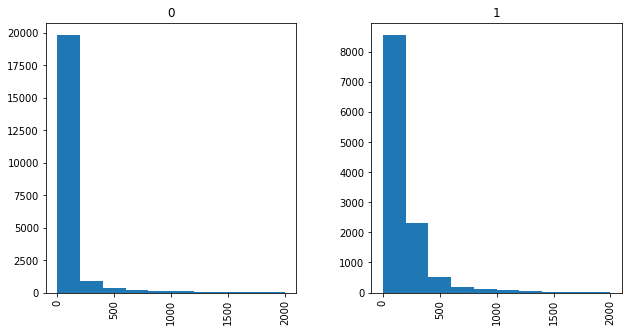

EVENT: hour
(0 outliers removed.)
-----Average-----
 Reached:	9.740253207009307
 Not Reached:	9.804777216352779
T test p-value: 0.2748962519594955


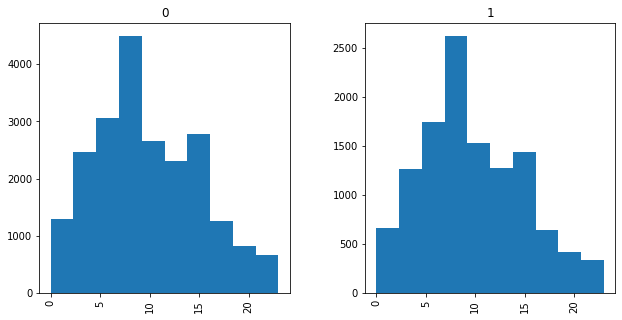

EVENT: weekday
(0 outliers removed.)
-----Average-----
 Reached:	2.431877253290853
 Not Reached:	2.360496095544327
T test p-value: 0.0006382724123210647


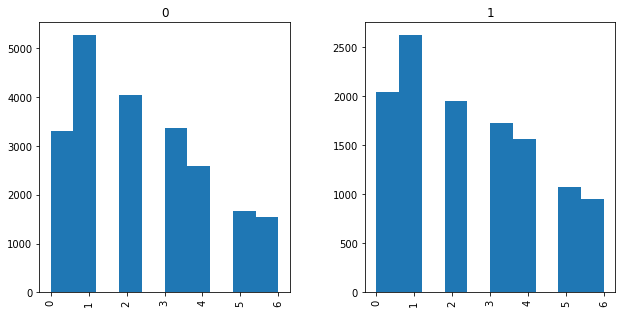

EVENT: old_customer
(0 outliers removed.)
-----Average-----
 Reached:	0.7721975350046114
 Not Reached:	0.8238401469912724
T test p-value: 7.683457177672076e-29


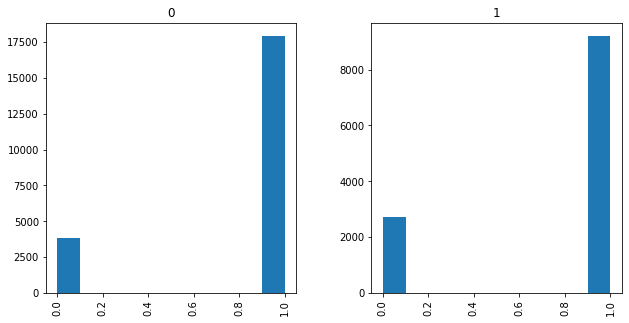

EVENT: ipq_application_prequalification___prequalification_change_phone_number
(15006 outliers removed.)
-----Average-----
 Reached:	7.741930074620608
 Not Reached:	1.0563160312356454
T test p-value: 0.0


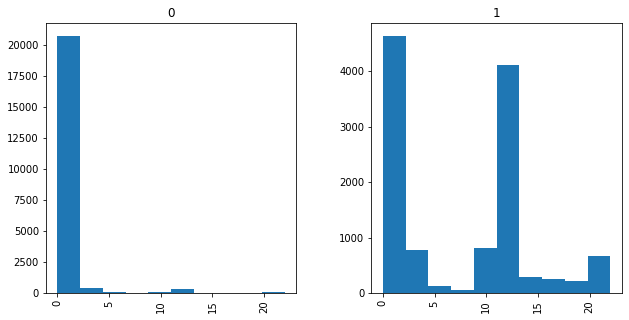

EVENT: ipq_application_prequalification___prequalification_change_phone_number_time
(830 outliers removed.)
-----Average-----
 Reached:	10.634319024062949
 Not Reached:	2.0649841525034622
T test p-value: 3.2539967569846317e-192


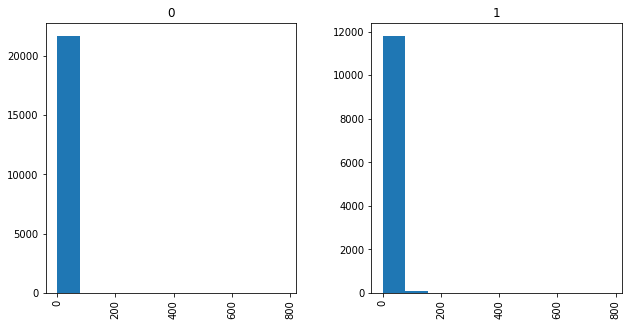

EVENT: ipq_application_prequalification___prequalification_change_employer_phone_number
(16426 outliers removed.)
-----Average-----
 Reached:	7.5279617674184625
 Not Reached:	0.6774000918695452
T test p-value: 0.0


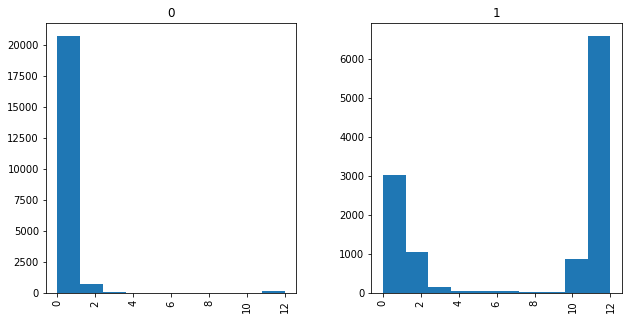

EVENT: ipq_application_prequalification___prequalification_change_employer_phone_number_time
(229 outliers removed.)
-----Average-----
 Reached:	18.54652150582711
 Not Reached:	4.470462580971156
T test p-value: 8.646153903972778e-99


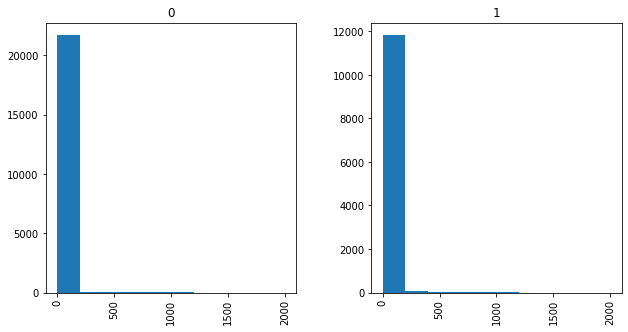

EVENT: ipq_application_prequalification__pageview_prequalification
(8469 outliers removed.)
-----Average-----
 Reached:	1.1001928397752998
 Not Reached:	1.0655489205328434
T test p-value: 1.2525116274811133e-11


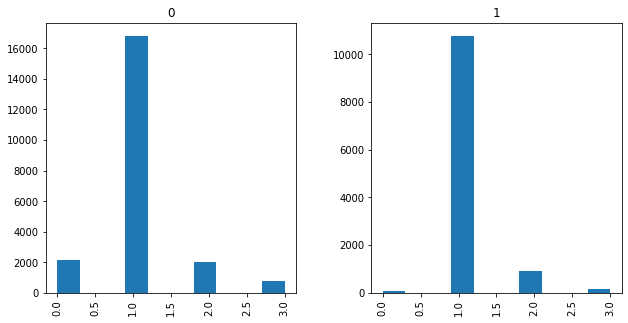

EVENT: ipq_application_prequalification__pageview_prequalification_time
(155 outliers removed.)
-----Average-----
 Reached:	12.017292194181202
 Not Reached:	12.461797169377775
T test p-value: 0.6313601538425428


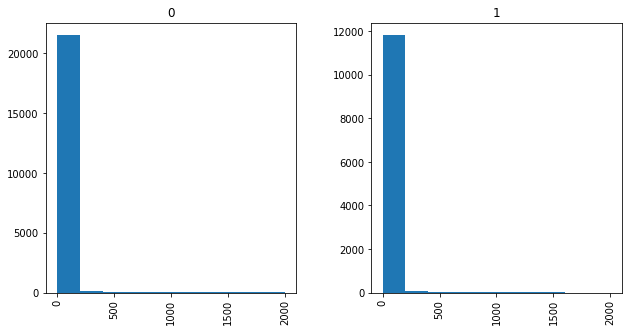

EVENT: prequalification_page_prequalification_results___prequalification_results
(8485 outliers removed.)
-----Average-----
 Reached:	1.1001089963947346
 Not Reached:	1.0658704639412035
T test p-value: 2.107282234427467e-11


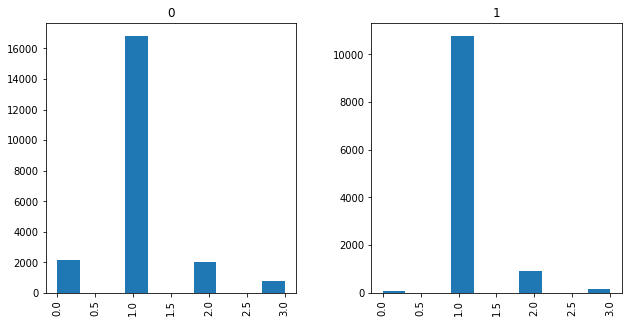

EVENT: prequalification_page_prequalification_results___prequalification_results_time
(530 outliers removed.)
-----Average-----
 Reached:	12.061328498365029
 Not Reached:	11.687041814088113
T test p-value: 0.671615160640495


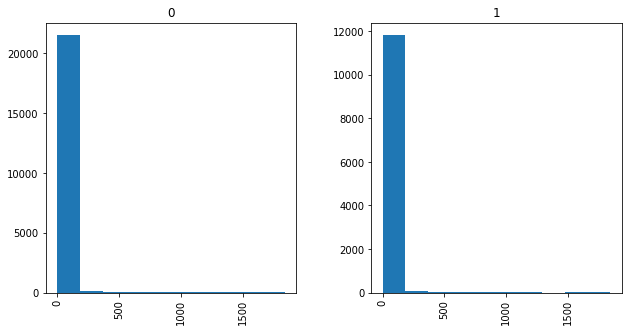

EVENT: ipq_application_prequalification___prequalification_change_applicant_first_name
(12035 outliers removed.)
-----Average-----
 Reached:	1.0228892428942735
 Not Reached:	0.2786403307303629
T test p-value: 0.0


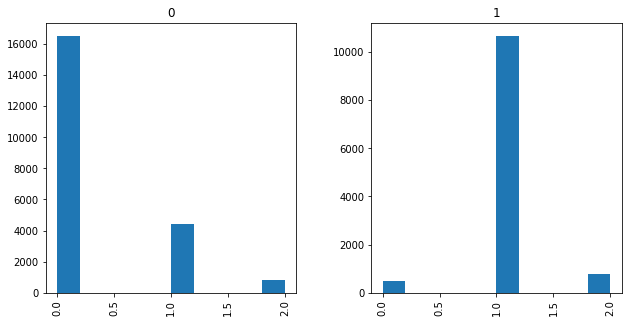

EVENT: ipq_application_prequalification___prequalification_change_applicant_first_name_time
(1185 outliers removed.)
-----Average-----
 Reached:	1.235105558816131
 Not Reached:	0.3138060174552134
T test p-value: 3.0092820904878665e-201


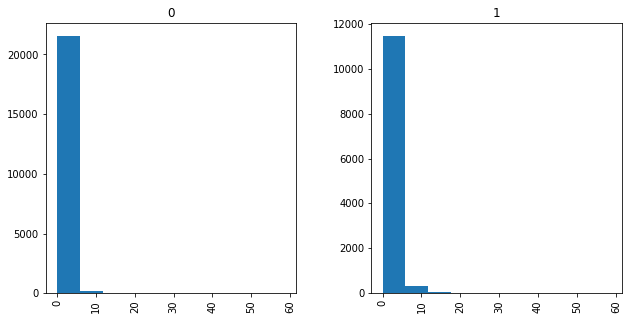

EVENT: ipq_application_prequalification___prequalification_change_applicant_full_names
(9497 outliers removed.)
-----Average-----
 Reached:	2.6836589251278613
 Not Reached:	0.717363344051447
T test p-value: 0.0


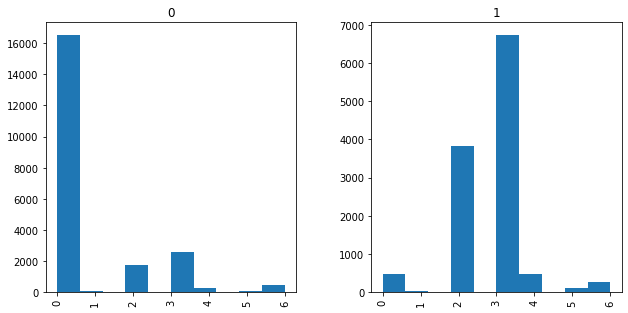

EVENT: ipq_application_prequalification___prequalification_change_applicant_full_names_time
(82 outliers removed.)
-----Average-----
 Reached:	6.871840362203406
 Not Reached:	2.079561828203943
T test p-value: 2.5960266599696057e-80


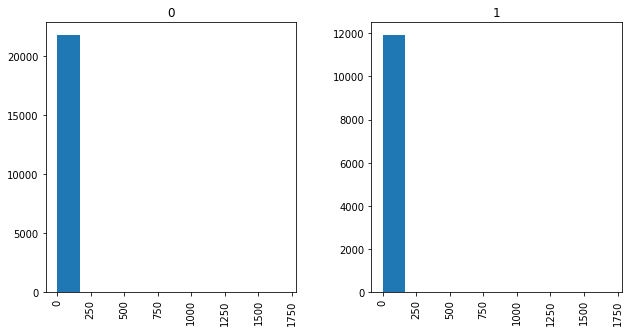

EVENT: ipq_application_prequalification___prequalification_change_applicant_last_name
(9964 outliers removed.)
-----Average-----
 Reached:	1.0098935189066822
 Not Reached:	0.2677537896187414
T test p-value: 0.0


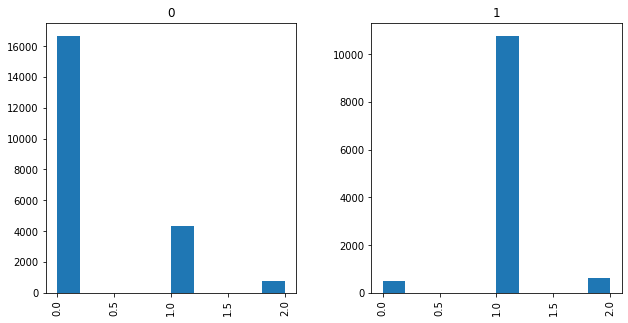

EVENT: ipq_application_prequalification___prequalification_change_applicant_last_name_time
(2218 outliers removed.)
-----Average-----
 Reached:	3.1966723400687447
 Not Reached:	0.7866359669269664
T test p-value: 2.4233545208545935e-259


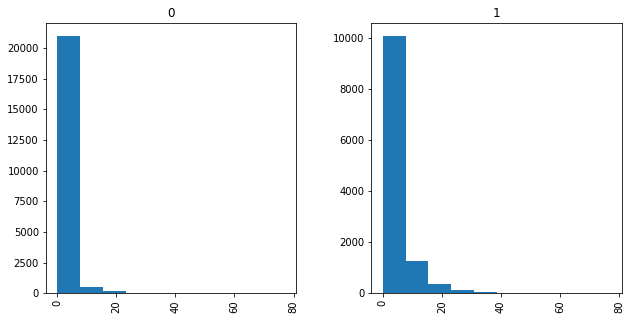

EVENT: ipq_application_prequalification___prequalification_change_email
(10551 outliers removed.)
-----Average-----
 Reached:	1.0110673262345937
 Not Reached:	0.2574644005512173
T test p-value: 0.0


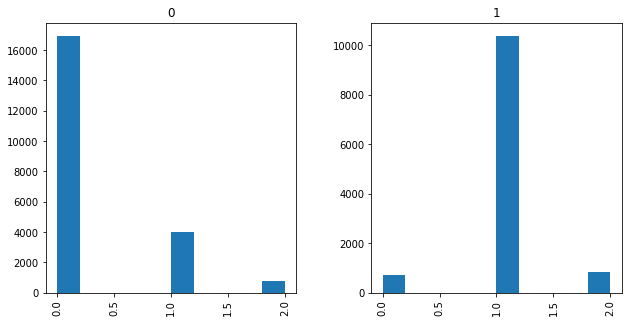

EVENT: ipq_application_prequalification___prequalification_change_email_time
(497 outliers removed.)
-----Average-----
 Reached:	5.038386266454272
 Not Reached:	1.811820165365184
T test p-value: 1.1671285084669946e-23


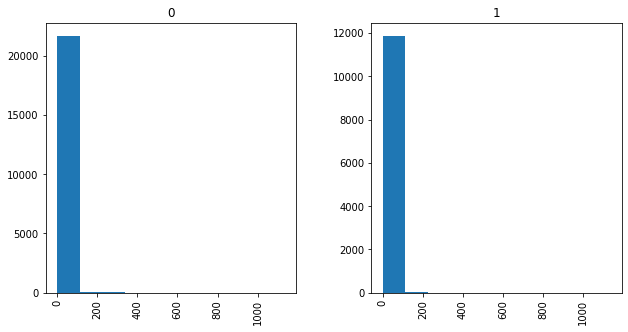

EVENT: ipq_application_prequalification___prequalification_change_contact_details
(7840 outliers removed.)
-----Average-----
 Reached:	4.675777647354741
 Not Reached:	0.9781809830041341
T test p-value: 0.0


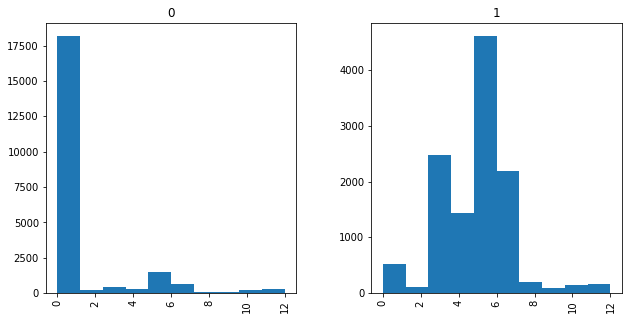

EVENT: ipq_application_prequalification___prequalification_change_contact_details_time
(162 outliers removed.)
-----Average-----
 Reached:	12.933756938039792
 Not Reached:	3.8645817638952615
T test p-value: 2.0318201851636366e-68


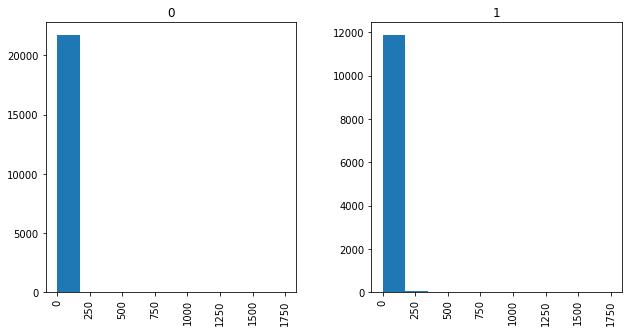

EVENT: ipq_application_prequalification___prequalification_change_applicant_home_address
(11874 outliers removed.)
-----Average-----
 Reached:	1.0415863167602917
 Not Reached:	0.1913642627468994
T test p-value: 0.0


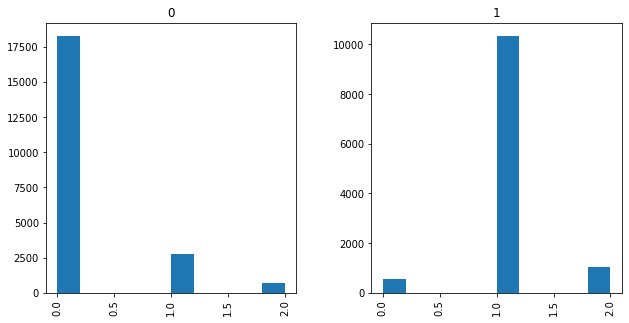

EVENT: ipq_application_prequalification___prequalification_change_applicant_home_address_time
(328 outliers removed.)
-----Average-----
 Reached:	1.6772210111511712
 Not Reached:	0.26788429030776295
T test p-value: 1.7567289321352347e-132


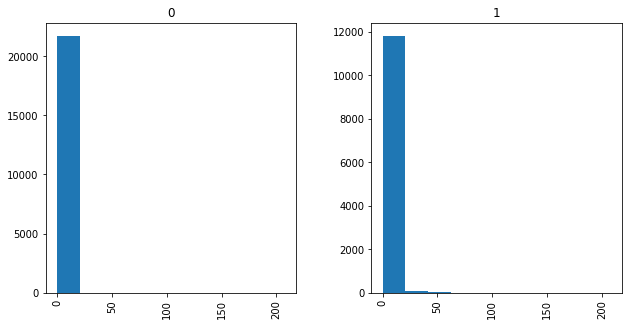

EVENT: ipq_application_prequalification___prequalification_change_applicant_address_zip
(8135 outliers removed.)
-----Average-----
 Reached:	1.0045275425505156
 Not Reached:	0.1814423518603583
T test p-value: 0.0


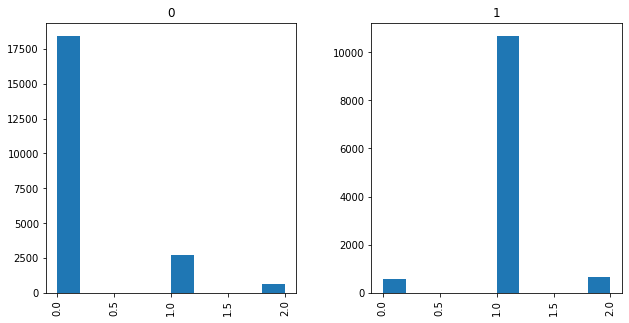

EVENT: ipq_application_prequalification___prequalification_change_applicant_address_zip_time
(1107 outliers removed.)
-----Average-----
 Reached:	1.5918692043263167
 Not Reached:	0.22961189710610974
T test p-value: 3.1873863398623274e-250


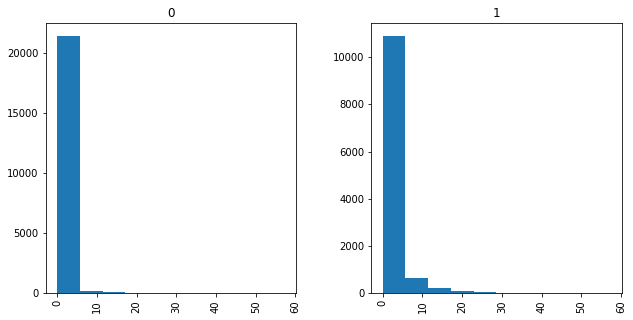

EVENT: ipq_application_prequalification___prequalification_change_applicant_address_city
(5855 outliers removed.)
-----Average-----
 Reached:	0.6842458287918168
 Not Reached:	0.14588883785025264
T test p-value: 0.0


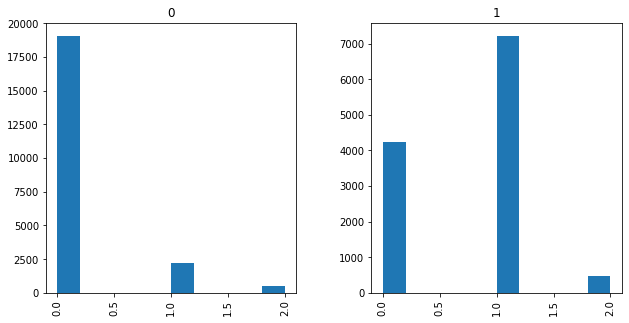

EVENT: ipq_application_prequalification___prequalification_change_applicant_address_city_time
(7091 outliers removed.)
-----Average-----
 Reached:	0.41587356418210725
 Not Reached:	0.05382273771244831
T test p-value: 9.594576605864189e-179


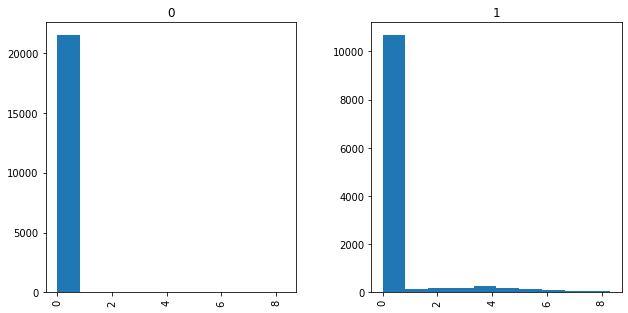

EVENT: ipq_application_prequalification___prequalification_change_desired_loan_amount
(7659 outliers removed.)
-----Average-----
 Reached:	1.1123501299572398
 Not Reached:	0.31768488745980705
T test p-value: 0.0


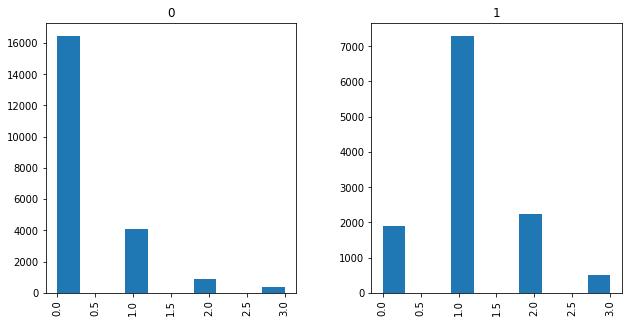

EVENT: ipq_application_prequalification___prequalification_change_desired_loan_amount_time
(940 outliers removed.)
-----Average-----
 Reached:	7.095117380732816
 Not Reached:	2.53333749827737
T test p-value: 1.138420120487857e-81


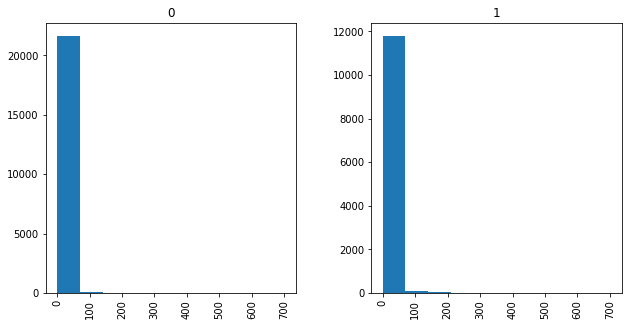

EVENT: ipq_application_prequalification___prequalification_change_applicant_middle_initial
(5788 outliers removed.)
-----Average-----
 Reached:	0.6427433554120903
 Not Reached:	0.16430868167202572
T test p-value: 0.0


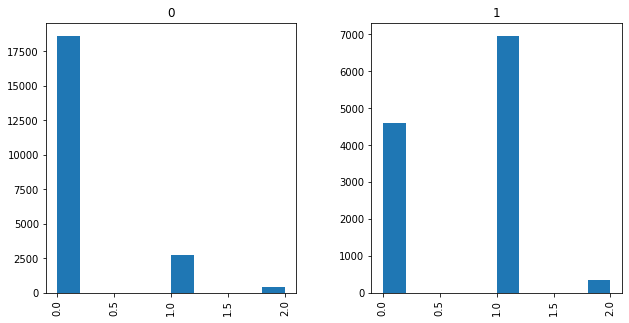

EVENT: ipq_application_prequalification___prequalification_change_applicant_middle_initial_time
(241 outliers removed.)
-----Average-----
 Reached:	1.387829881780835
 Not Reached:	0.3944716123105194
T test p-value: 1.5496789292093813e-47


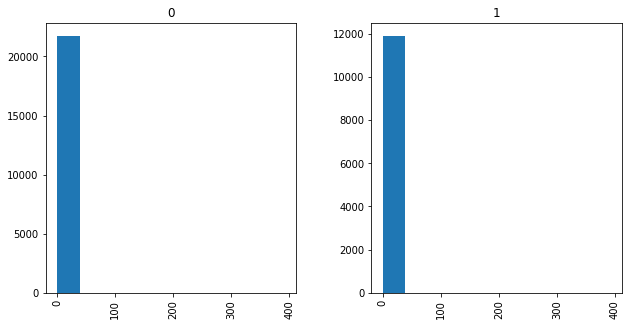

EVENT: ipq_application_prequalification___prequalification_change_birth_date_month
(5084 outliers removed.)
-----Average-----
 Reached:	0.9678041418629999
 Not Reached:	0.11598530087276068
T test p-value: 0.0


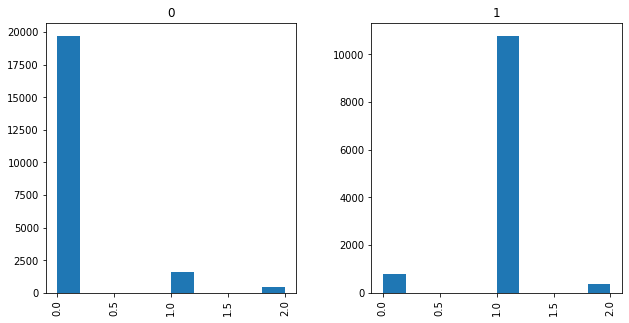

EVENT: ipq_application_prequalification___prequalification_change_birth_date_month_time
(791 outliers removed.)
-----Average-----
 Reached:	3.904869120482934
 Not Reached:	0.49242494258153463
T test p-value: 0.0


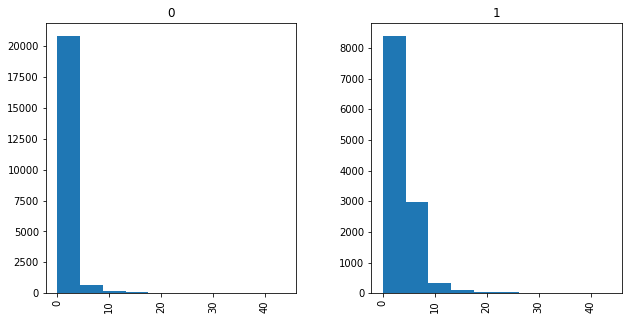

EVENT: ipq_application_prequalification___prequalification_change_birth_date_day
(6380 outliers removed.)
-----Average-----
 Reached:	1.0031022050809089
 Not Reached:	0.11639871382636656
T test p-value: 0.0


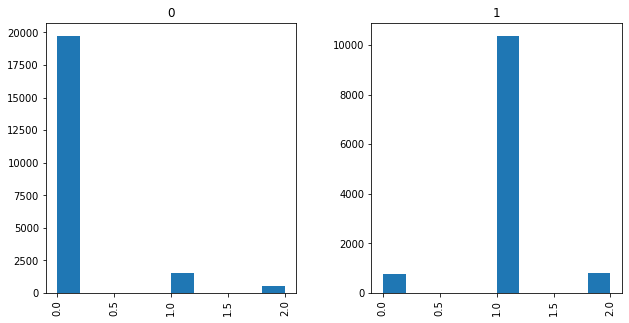

EVENT: ipq_application_prequalification___prequalification_change_birth_date_day_time
(600 outliers removed.)
-----Average-----
 Reached:	6.603049719124665
 Not Reached:	0.8099668810289385
T test p-value: 0.0


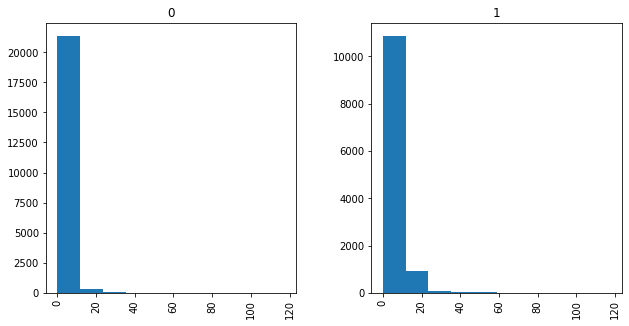

EVENT: ipq_application_prequalification___prequalification_change_birth_date_year
(5557 outliers removed.)
-----Average-----
 Reached:	0.9771946004862916
 Not Reached:	0.11286173633440515
T test p-value: 0.0


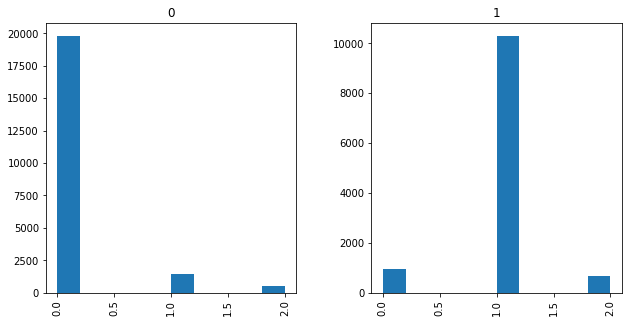

EVENT: ipq_application_prequalification___prequalification_change_birth_date_year_time
(1333 outliers removed.)
-----Average-----
 Reached:	2.999772197535003
 Not Reached:	0.40587147450620153
T test p-value: 0.0


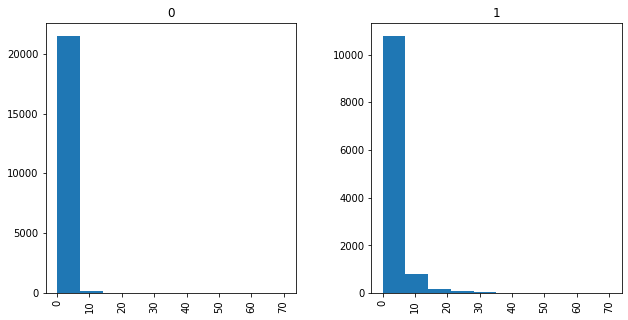

EVENT: ipq_application_prequalification___prequalification_click_ssn
(8132 outliers removed.)
-----Average-----
 Reached:	1.1185545401190575
 Not Reached:	0.1337620578778135
T test p-value: 0.0


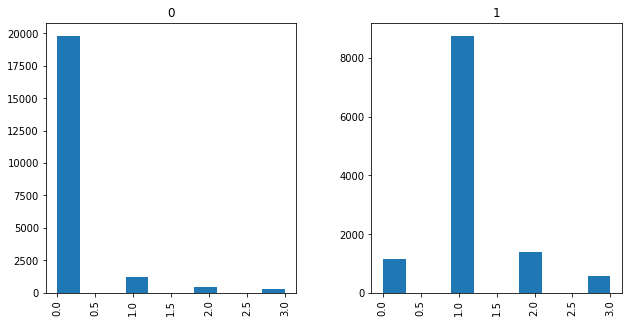

EVENT: ipq_application_prequalification___prequalification_click_ssn_time
(762 outliers removed.)
-----Average-----
 Reached:	7.21897233168443
 Not Reached:	0.9470091869545247
T test p-value: 0.0


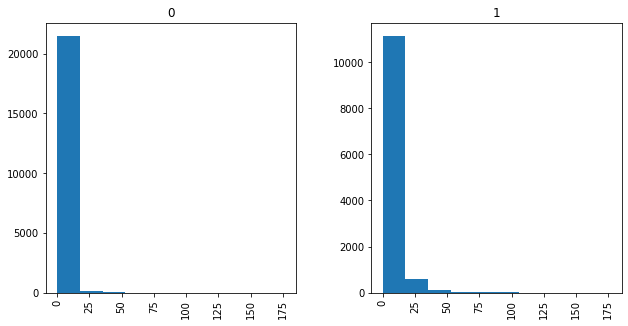

EVENT: ipq_application_prequalification___prequalification_change_last4__ssn
(17949 outliers removed.)
-----Average-----
 Reached:	0.9073530644755596
 Not Reached:	0.0864951768488746
T test p-value: 0.0


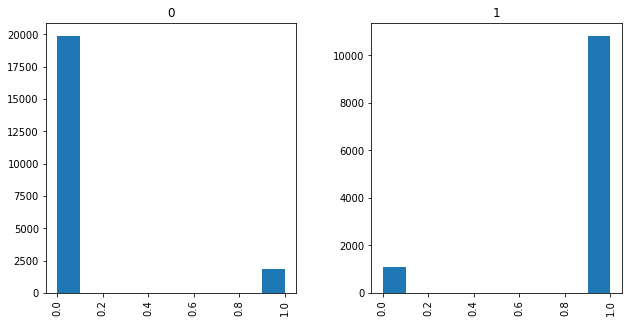

EVENT: ipq_application_prequalification___prequalification_change_last4__ssn_time
(1508 outliers removed.)
-----Average-----
 Reached:	2.001992286408919
 Not Reached:	0.2591670647680296
T test p-value: 4.702937186229364e-204


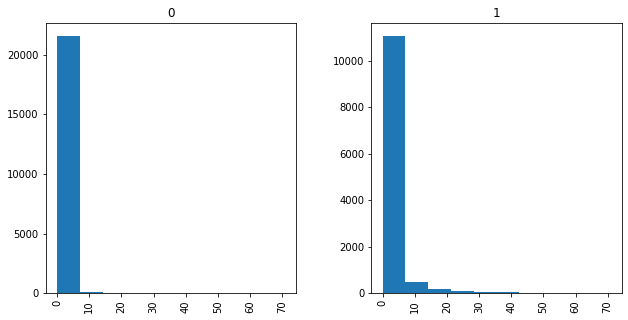

EVENT: ipq_application_prequalification___prequalification_change_monthly_net_income
(7388 outliers removed.)
-----Average-----
 Reached:	0.9679718286241301
 Not Reached:	0.11157556270096464
T test p-value: 0.0


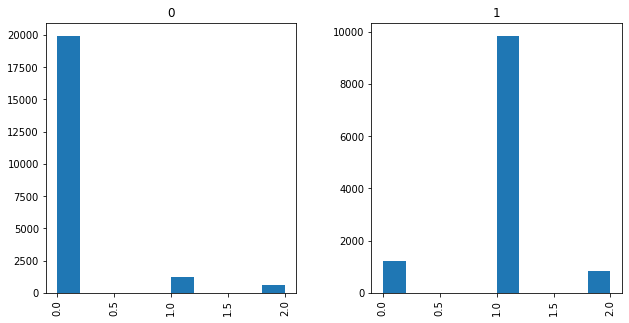

EVENT: ipq_application_prequalification___prequalification_change_monthly_net_income_time
(229 outliers removed.)
-----Average-----
 Reached:	2.940522428104274
 Not Reached:	0.5810342214056052
T test p-value: 2.3759957044588592e-71


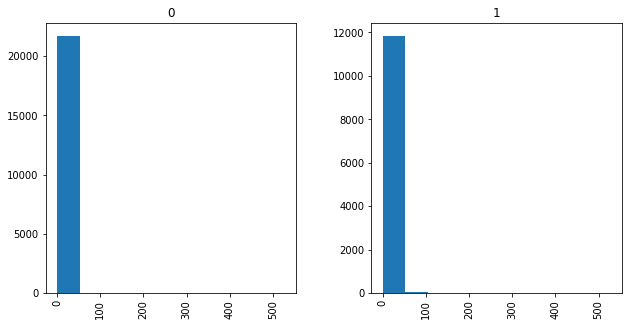

EVENT: ipq_application_prequalification___prequalification_click_source_of_income
(12240 outliers removed.)
-----Average-----
 Reached:	1.1447136748553701
 Not Reached:	0.14997703261368855
T test p-value: 0.0


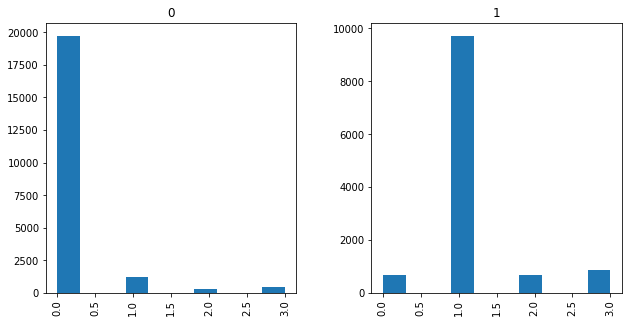

EVENT: ipq_application_prequalification___prequalification_click_source_of_income_time
(588 outliers removed.)
-----Average-----
 Reached:	7.77503487884631
 Not Reached:	0.7506052365640795
T test p-value: 6.422713177463175e-268


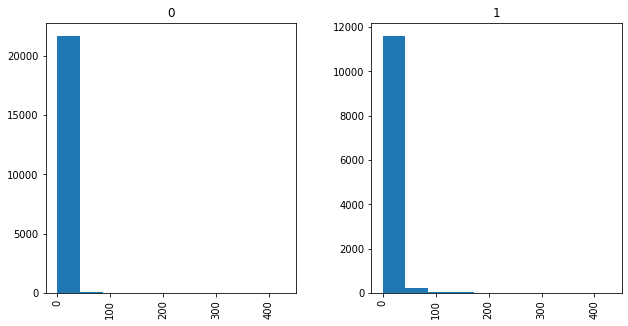

EVENT: ipq_application_prequalification___prequalification_click_employment_type_employed
(7750 outliers removed.)
-----Average-----
 Reached:	0.8053156703278276
 Not Reached:	0.09857602204869086
T test p-value: 0.0


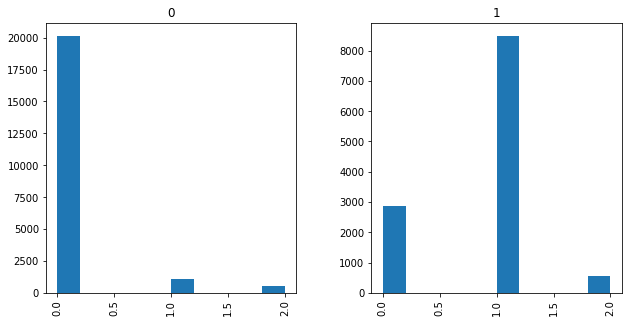

EVENT: ipq_application_prequalification___prequalification_click_employment_type_employed_time
(1815 outliers removed.)
-----Average-----
 Reached:	4.665567116626148
 Not Reached:	0.3524591639871383
T test p-value: 0.0


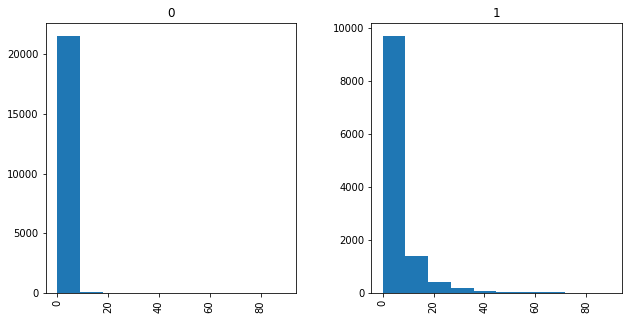

EVENT: ipq_application_prequalification___prequalification_click_employment_type_selfemployed
(6607 outliers removed.)
-----Average-----
 Reached:	0.1358262765154691
 Not Reached:	0.01414790996784566
T test p-value: 4.618295923759502e-294


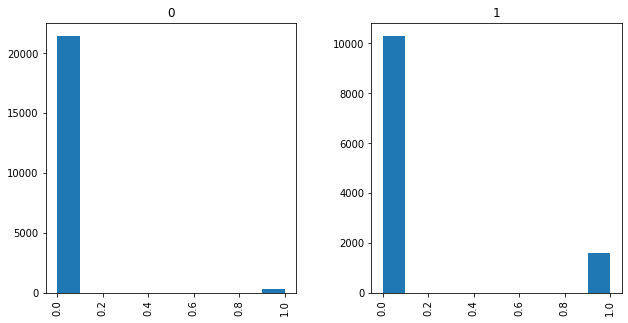

EVENT: ipq_application_prequalification___prequalification_click_employment_type_selfemployed_time
(749 outliers removed.)
-----Average-----
 Reached:	0.6054002682988185
 Not Reached:	0.034690215893431346
T test p-value: 1.9237679715637435e-102


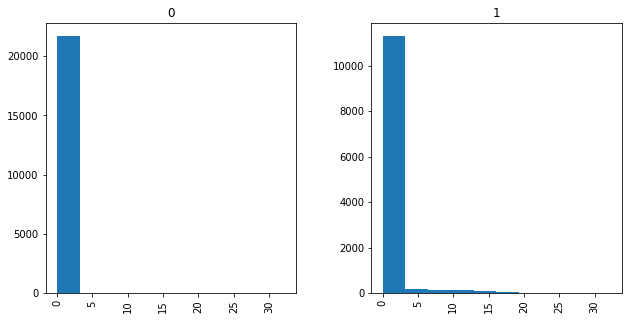

EVENT: ipq_application_prequalification___prequalification_change_current_employer
(6248 outliers removed.)
-----Average-----
 Reached:	0.7824264274335542
 Not Reached:	0.01621497473587506
T test p-value: 0.0


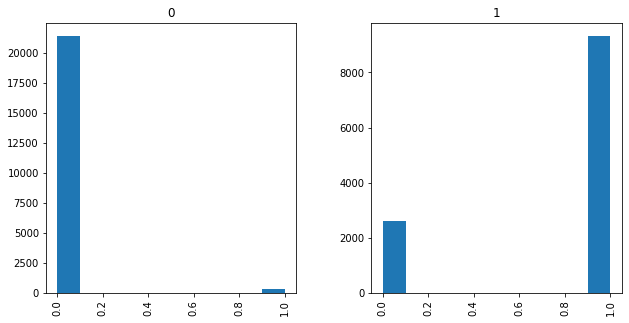

EVENT: ipq_application_prequalification___prequalification_change_current_employer_time
(3068 outliers removed.)
-----Average-----
 Reached:	4.992073782174895
 Not Reached:	0.08991313734497013
T test p-value: 0.0


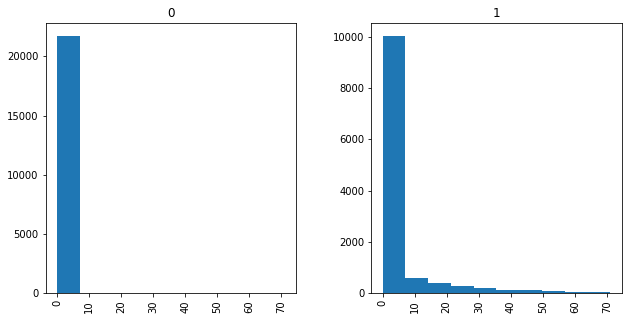

EVENT: ipq_application_prequalification___prequalification_change_consolidated_consents
(13290 outliers removed.)
-----Average-----
 Reached:	0.9263016684832732
 Not Reached:	0.06734037666513551
T test p-value: 0.0


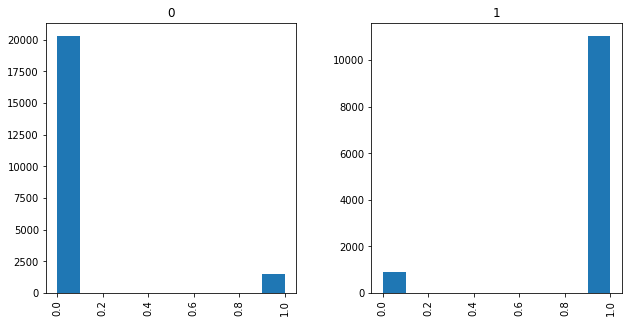

EVENT: ipq_application_prequalification___prequalification_change_consolidated_consents_time
(483 outliers removed.)
-----Average-----
 Reached:	10.755701685251957
 Not Reached:	2.8402741846577864
T test p-value: 3.2193307617117434e-144


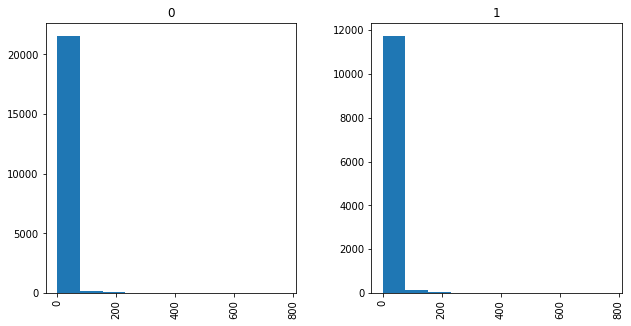

EVENT: ipq_application_prequalification___prequalification_click_car_ownership
(6380 outliers removed.)
-----Average-----
 Reached:	1.0308543640479584
 Not Reached:	0.13853927423059256
T test p-value: 0.0


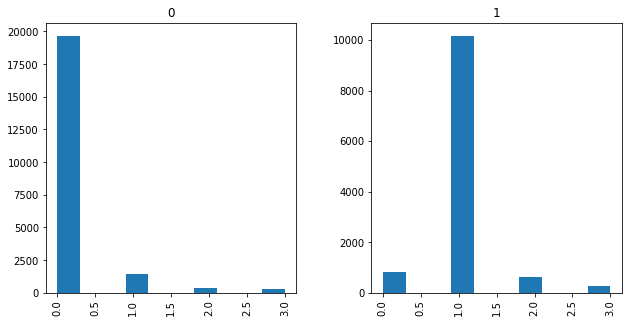

EVENT: ipq_application_prequalification___prequalification_click_car_ownership_time
(4278 outliers removed.)
-----Average-----
 Reached:	8.182466588412844
 Not Reached:	0.9519862655029847
T test p-value: 0.0


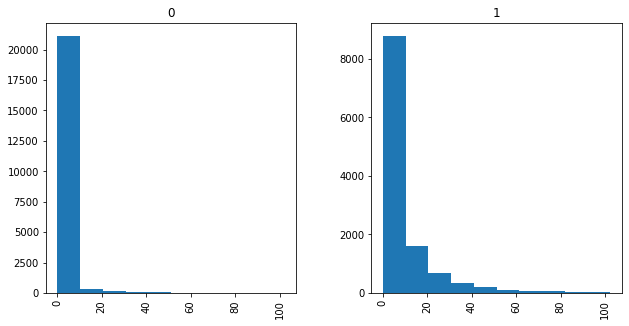

EVENT: ipq_application_prequalification___prequalification_click_car_ownership_no
(5734 outliers removed.)
-----Average-----
 Reached:	0.23367150163494593
 Not Reached:	0.024621038125861278
T test p-value: 0.0


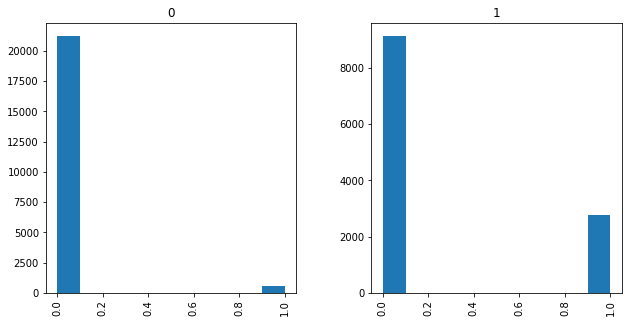

EVENT: ipq_application_prequalification___prequalification_click_car_ownership_no_time
(634 outliers removed.)
-----Average-----
 Reached:	1.7954089880103976
 Not Reached:	0.20316651355075793
T test p-value: 1.2494741032304969e-113


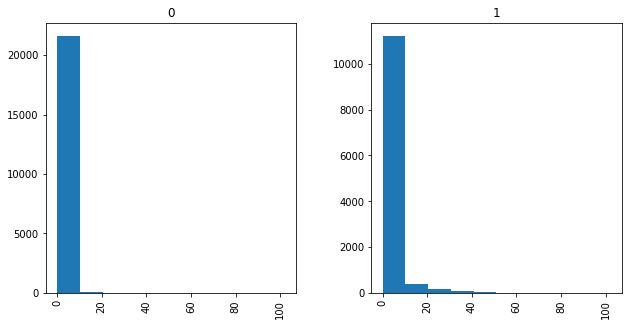

EVENT: ipq_application_prequalification___prequalification_click_car_ownership_own
(3996 outliers removed.)
-----Average-----
 Reached:	0.5523601911629077
 Not Reached:	0.07404685346807534
T test p-value: 0.0


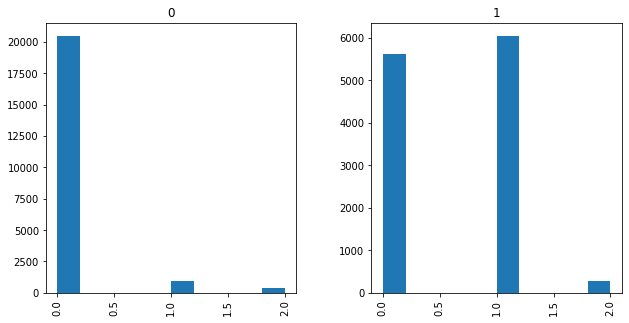

EVENT: ipq_application_prequalification___prequalification_click_car_ownership_own_time
(3774 outliers removed.)
-----Average-----
 Reached:	4.371339649534664
 Not Reached:	0.45345130914102
T test p-value: 0.0


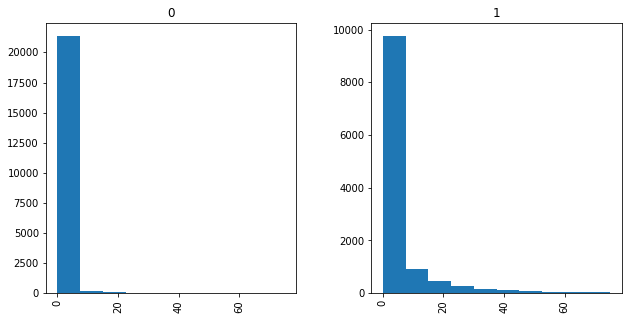

EVENT: ipq_application_prequalification___prequalification_click_employment_type_retired
(12102 outliers removed.)
-----Average-----
 Reached:	0.0
 Not Reached:	0.0


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


T test p-value: nan


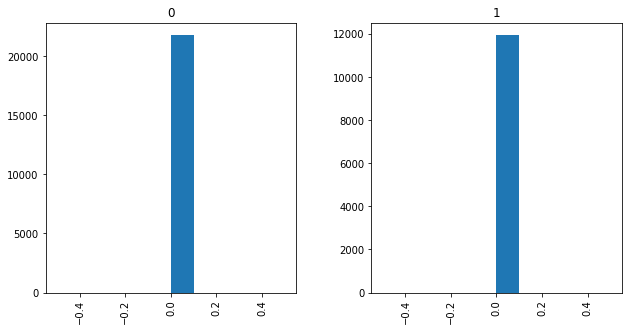

EVENT: ipq_application_prequalification___prequalification_click_employment_type_retired_time
(1316 outliers removed.)
-----Average-----
 Reached:	0.09590668231743105
 Not Reached:	0.009855489205328435
T test p-value: 2.727577882173784e-48


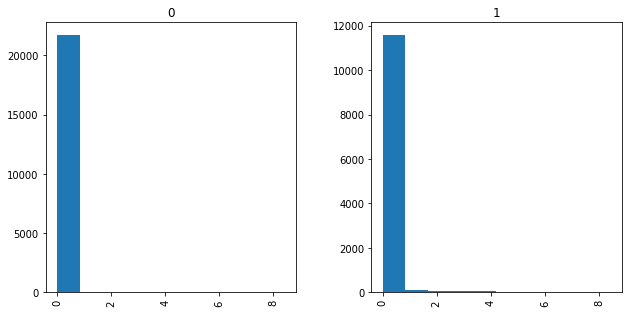

EVENT: ipq_application_prequalification___prequalification_change_applicant_address_apt_number
(15329 outliers removed.)
-----Average-----
 Reached:	0.24054665884128448
 Not Reached:	0.03587505741846578
T test p-value: 0.0


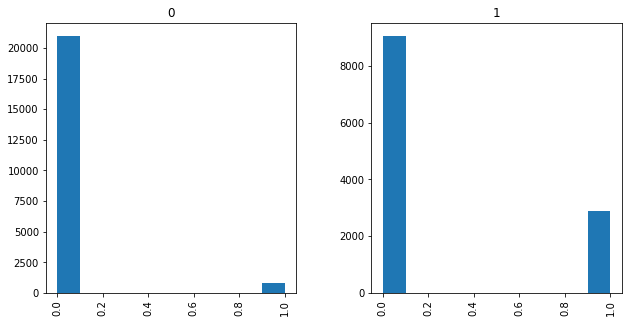

EVENT: ipq_application_prequalification___prequalification_change_applicant_address_apt_number_time
(499 outliers removed.)
-----Average-----
 Reached:	0.44868634191330503
 Not Reached:	0.0598425815342214
T test p-value: 3.0374191587184846e-74


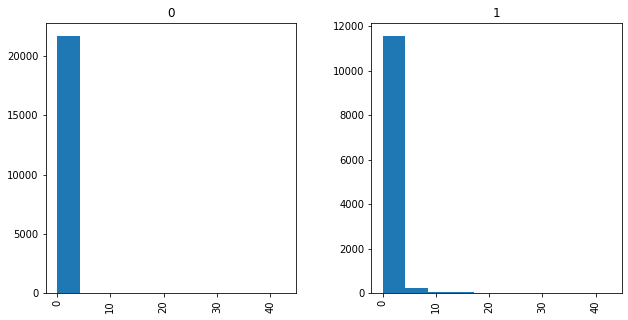

EVENT: ipq_application_prequalification___prequalification_click_applicant_phone_type_mobile
(5628 outliers removed.)
-----Average-----
 Reached:	0.7685922696403119
 Not Reached:	0.10165365181442351
T test p-value: 0.0


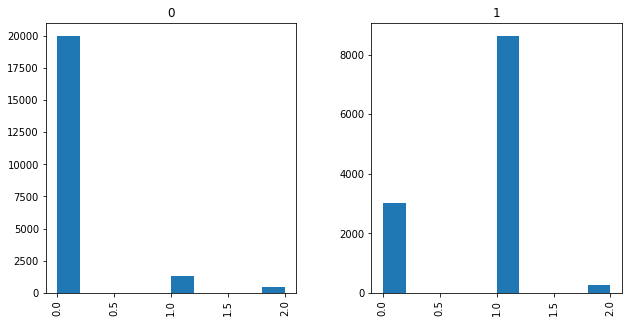

EVENT: ipq_application_prequalification___prequalification_click_applicant_phone_type_mobile_time
(361 outliers removed.)
-----Average-----
 Reached:	1.8387480506413973
 Not Reached:	0.31185502985760194
T test p-value: 6.006751684423188e-266


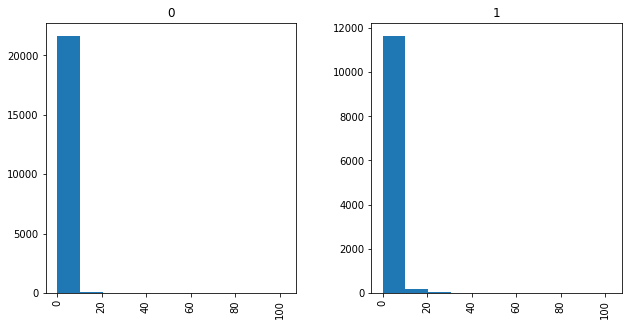

EVENT: ipq_application_prequalification___prequalification_click_phone_type
(10809 outliers removed.)
-----Average-----
 Reached:	0.8627483860149241
 Not Reached:	0.11401010564997703
T test p-value: 0.0


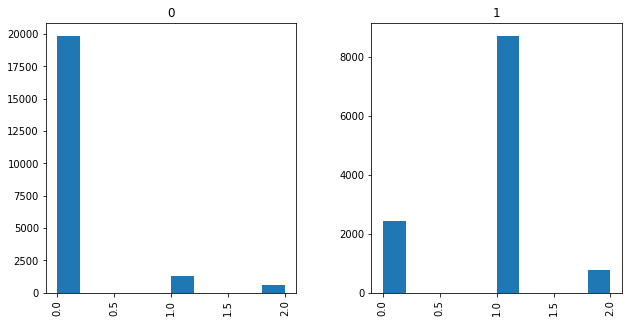

EVENT: ipq_application_prequalification___prequalification_click_phone_type_time
(6547 outliers removed.)
-----Average-----
 Reached:	1.6972714848662753
 Not Reached:	0.2271787322002755
T test p-value: 0.0


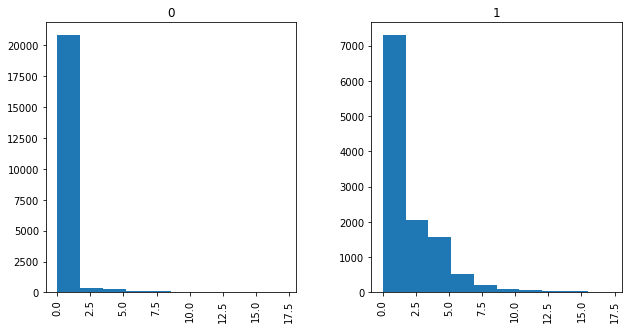

EVENT: ipq_application_prequalification___prequalification_click_car_ownership_lease
(6530 outliers removed.)
-----Average-----
 Reached:	0.2295631759872558
 Not Reached:	0.024299494717501147
T test p-value: 0.0


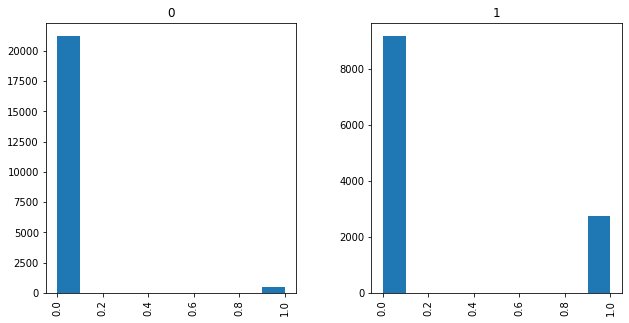

EVENT: ipq_application_prequalification___prequalification_click_car_ownership_lease_time
(2725 outliers removed.)
-----Average-----
 Reached:	1.288704535926891
 Not Reached:	0.13766164446485984
T test p-value: 1.076162358826315e-136


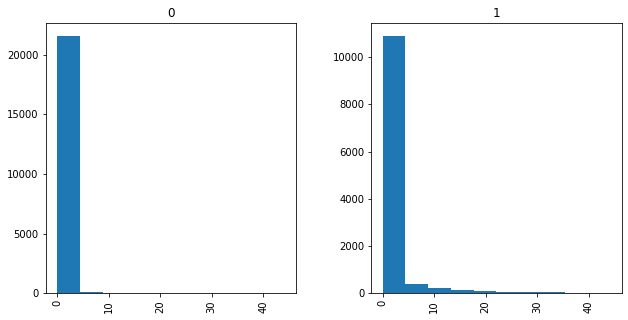

EVENT: ipq_application_prequalification__ipq_tcpa_consent_checkbox
(15999 outliers removed.)
-----Average-----
 Reached:	0.2773539029093653
 Not Reached:	0.04253559944878273
T test p-value: 0.0


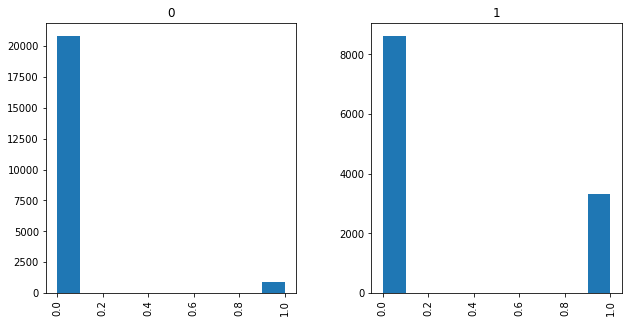

EVENT: ipq_application_prequalification__ipq_tcpa_consent_checkbox_time
(1180 outliers removed.)
-----Average-----
 Reached:	0.9181837846901986
 Not Reached:	0.7727797427652741
T test p-value: 0.020137058355788377


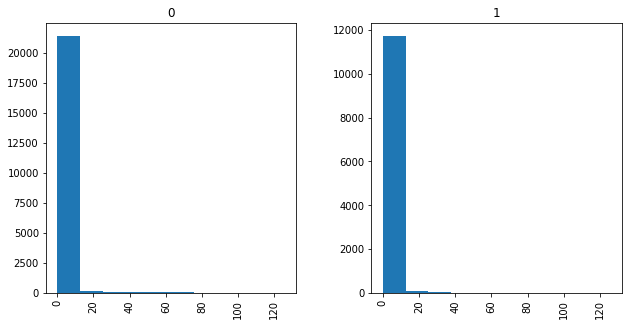

EVENT: ipq_application_prequalification___prequalification_change_autodial_marketing
(15969 outliers removed.)
-----Average-----
 Reached:	0.2773539029093653
 Not Reached:	0.04253559944878273
T test p-value: 0.0


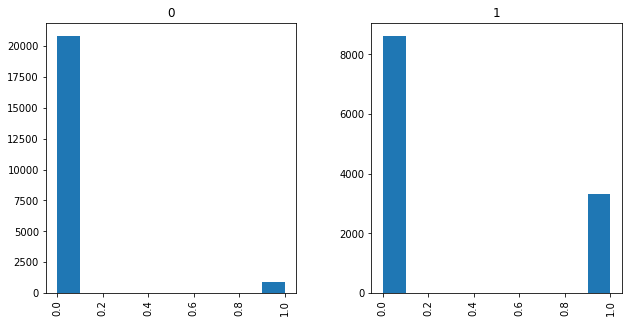

EVENT: ipq_application_prequalification___prequalification_change_autodial_marketing_time
(2302 outliers removed.)
-----Average-----
 Reached:	0.7965135407059626
 Not Reached:	0.5919136885622419
T test p-value: 2.2946585952167135e-05


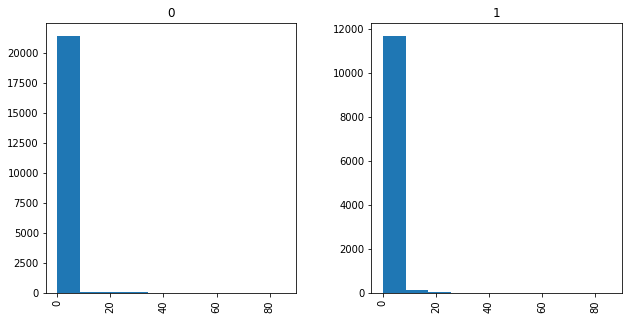

EVENT: ipq_application_prequalification___prequalification_click_loan_amounts_and_fees
(38253 outliers removed.)
-----Average-----
 Reached:	0.0
 Not Reached:	0.0
T test p-value: nan


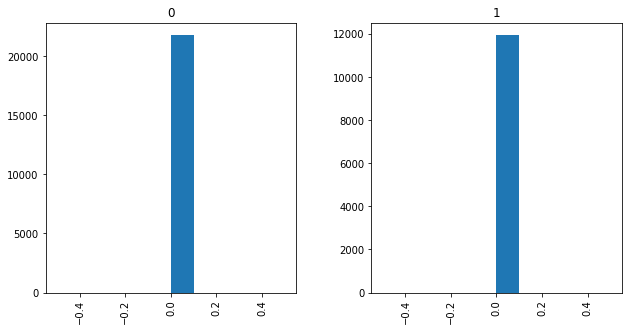

EVENT: ipq_application_prequalification___prequalification_click_loan_amounts_and_fees_time
(174 outliers removed.)
-----Average-----
 Reached:	4.211230233923032
 Not Reached:	2.4196820395039014
T test p-value: 0.00017885016293192477


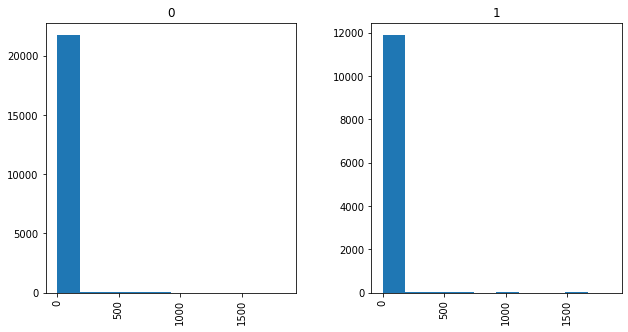

EVENT: ipq_application_prequalification___prequalification_click_employment_type_other
(23090 outliers removed.)
-----Average-----
 Reached:	0.0
 Not Reached:	0.0
T test p-value: nan


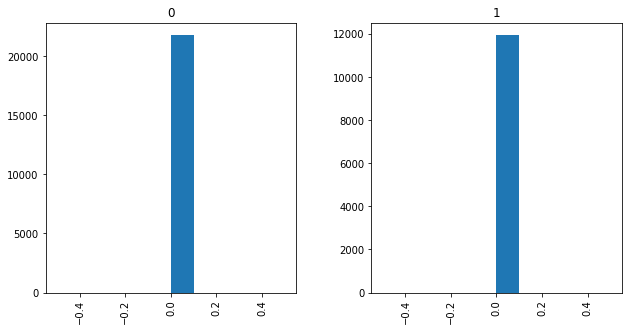

EVENT: ipq_application_prequalification___prequalification_click_employment_type_other_time
(1217 outliers removed.)
-----Average-----
 Reached:	0.3894145216735138
 Not Reached:	0.0326604042259991
T test p-value: 1.3162008565241956e-81


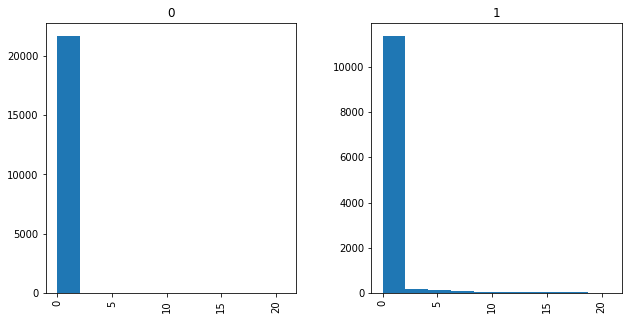

EVENT: ipq_application_prequalification___prequalification_click_applicant_phone_type_home
(35923 outliers removed.)
-----Average-----
 Reached:	0.0
 Not Reached:	0.0
T test p-value: nan


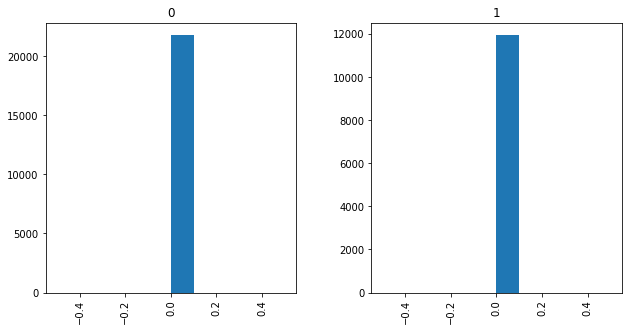

EVENT: ipq_application_prequalification___prequalification_click_applicant_phone_type_home_time
(4905 outliers removed.)
-----Average-----
 Reached:	0.06388505072524528
 Not Reached:	0.00883426734037666
T test p-value: 3.0790126768140765e-46


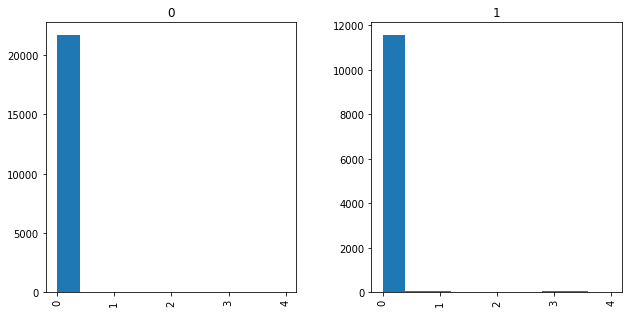

EVENT: ipq_application_prequalification___prequalification_click_wage_calculator
(21942 outliers removed.)
-----Average-----
 Reached:	0.0
 Not Reached:	0.0
T test p-value: nan


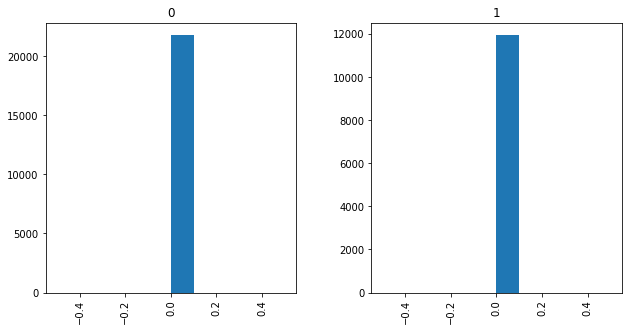

EVENT: ipq_application_prequalification___prequalification_click_wage_calculator_time
(2060 outliers removed.)
-----Average-----
 Reached:	1.107158631676028
 Not Reached:	0.13750211299954063
T test p-value: 7.638834546455028e-55


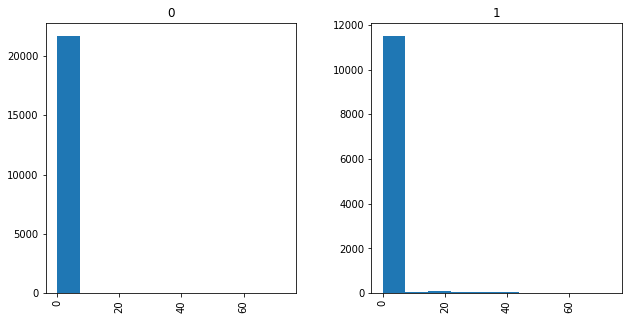

EVENT: ipq_application_prequalification___prequalification_click_not_sure
(21935 outliers removed.)
-----Average-----
 Reached:	0.0
 Not Reached:	0.0
T test p-value: nan


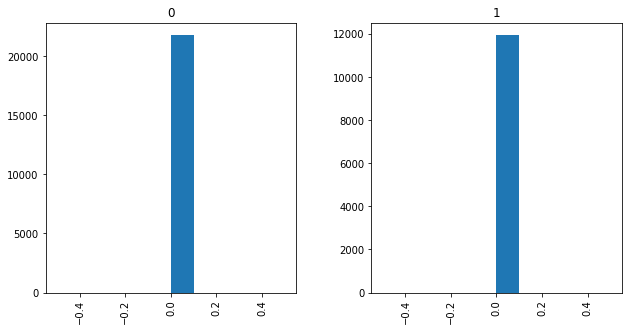

EVENT: ipq_application_prequalification___prequalification_click_not_sure_time
(1106 outliers removed.)
-----Average-----
 Reached:	1.354500125765071
 Not Reached:	0.2007474506201193
T test p-value: 1.4621440334985377e-53


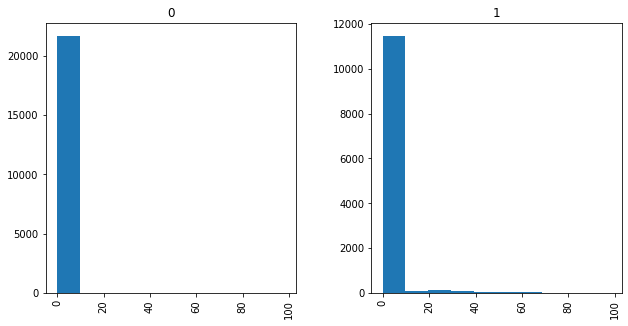

EVENT: ipq_application_prequalification___prequalification_click_dm_link_mobile_
(9643 outliers removed.)
-----Average-----
 Reached:	0.0
 Not Reached:	0.0
T test p-value: nan


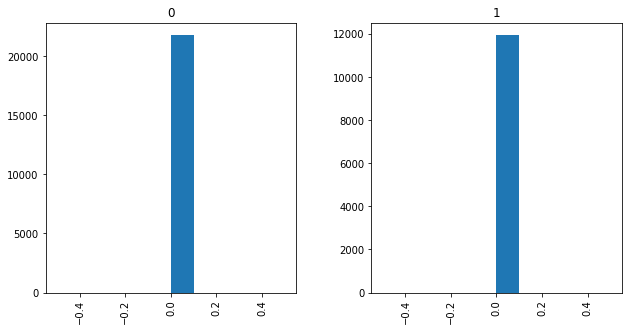

EVENT: ipq_application_prequalification___prequalification_click_dm_link_mobile__time
(610 outliers removed.)
-----Average-----
 Reached:	0.022133730192001343
 Not Reached:	0.14447969683050063
T test p-value: 4.863491677778254e-12


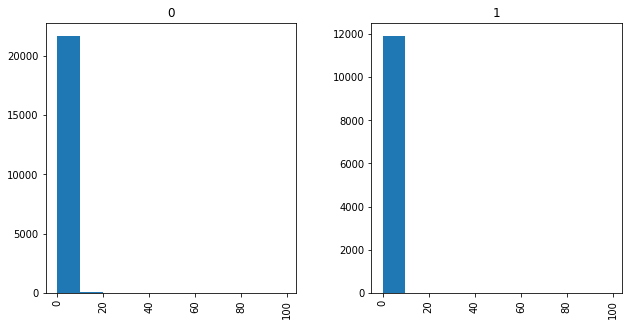

EVENT: ipq_application_prequalification___prequalification_click_look_up_my_offer
(13041 outliers removed.)
-----Average-----
 Reached:	0.0
 Not Reached:	0.0
T test p-value: nan


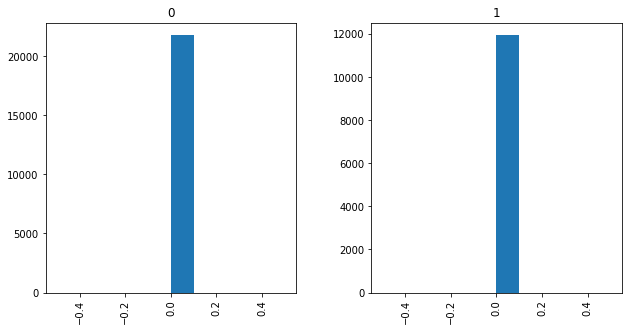

EVENT: ipq_results_prequalification_results___prequalification_results_click_loan_amounts_and_fees
(2952 outliers removed.)
-----Average-----
 Reached:	0.0
 Not Reached:	0.0
T test p-value: nan


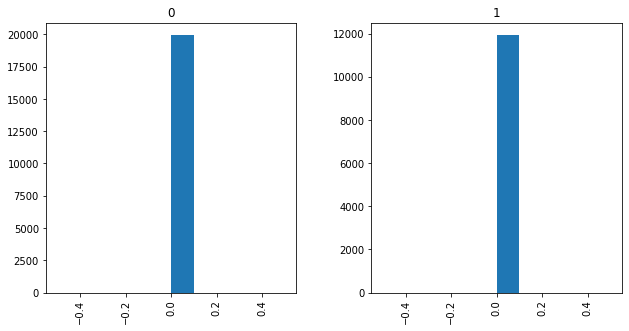

EVENT: ipq_results_prequalification_results___prequalification_results_click_loan_amounts_and_fees_time
(424 outliers removed.)
-----Average-----
 Reached:	0.05212059711506206
 Not Reached:	0.2319856052244299
T test p-value: 6.806189955728899e-07


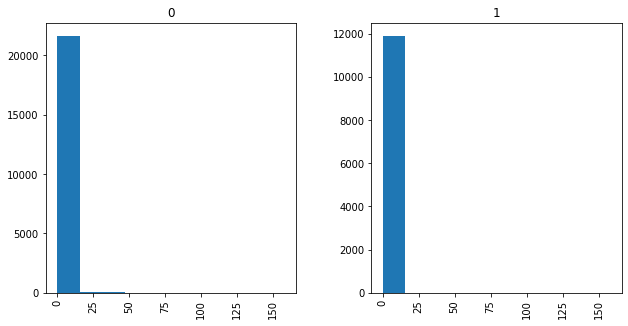

EVENT: ipq_application_prequalification___prequalification_click_look_up_my_offer_time
(115 outliers removed.)
-----Average-----
 Reached:	0.2246055168944411
 Not Reached:	0.6317423518603589
T test p-value: 1.3546634556923107e-05


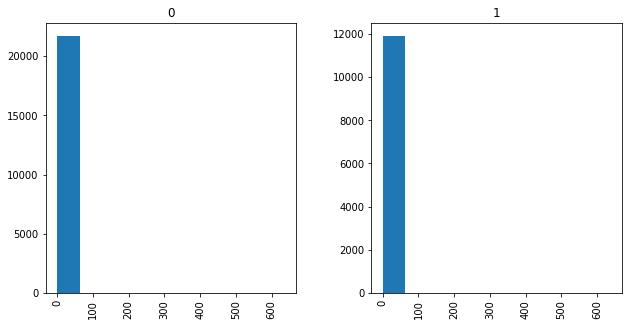

EVENT: ipq_application_prequalification___prequalification_click_applicant_phone_type_other
(5751 outliers removed.)
-----Average-----
 Reached:	0.0
 Not Reached:	0.0
T test p-value: nan


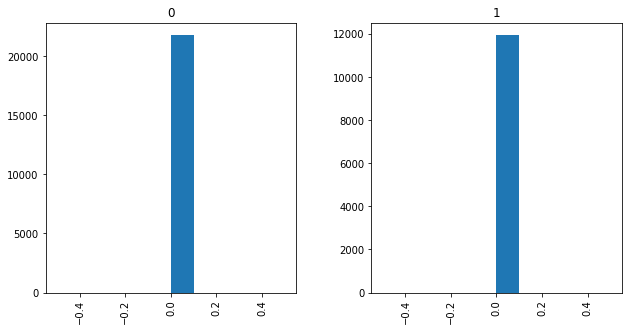

EVENT: ipq_application_prequalification___prequalification_click_applicant_phone_type_other_time
(2004 outliers removed.)
-----Average-----
 Reached:	0.0021675190743690787
 Not Reached:	0.000460128617363344
T test p-value: 0.00018017607569558458


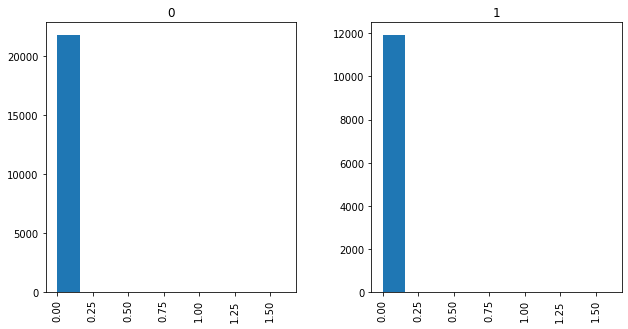

EVENT: ipq_results_prequalification_results___prequalification_results_click_are_you_retired_yes
(115 outliers removed.)
-----Average-----
 Reached:	0.0
 Not Reached:	0.0
T test p-value: nan


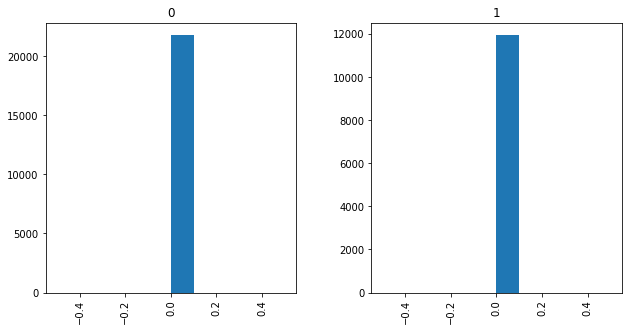

EVENT: ipq_results_prequalification_results___prequalification_results_click_are_you_retired_yes_time
(111 outliers removed.)
-----Average-----
 Reached:	0.0
 Not Reached:	1.094806568839413e-05
T test p-value: 0.3173216389670496


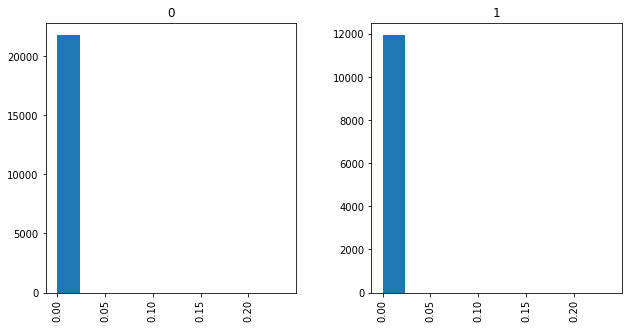

EVENT: ipq_results_prequalification_results___prequalification_results_click_checking_saving_checking
(389 outliers removed.)
-----Average-----
 Reached:	0.0
 Not Reached:	0.0
T test p-value: nan


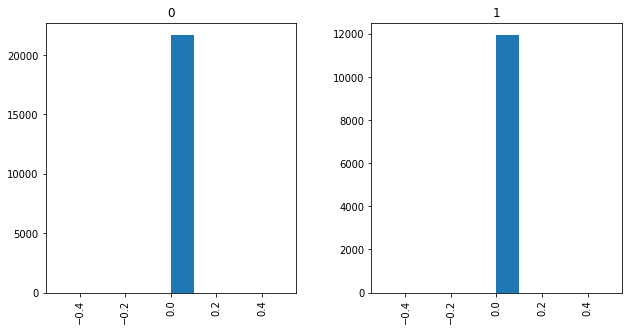

EVENT: ipq_results_prequalification_results___prequalification_results_click_loan_purpose_medical_expenses
(78 outliers removed.)
-----Average-----
 Reached:	0.0
 Not Reached:	0.0
T test p-value: nan


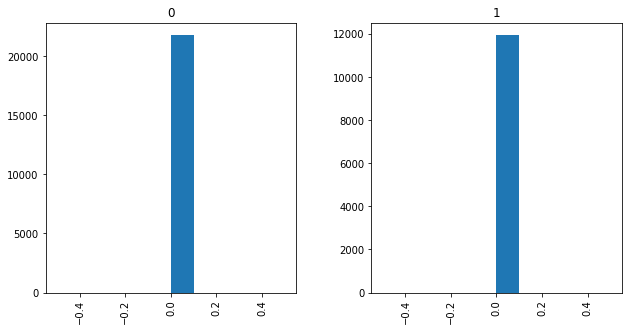

EVENT: ipq_results_prequalification_results___prequalification_results_click_loan_purpose_medical_expenses_time
(65 outliers removed.)
-----Average-----
 Reached:	0.0
 Not Reached:	8.529912171793811e-05
T test p-value: 0.25103598474562655


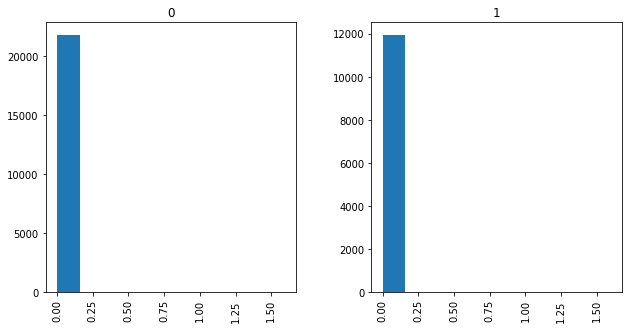

EVENT: ipq_results_prequalification_results___prequalification_results_click_checking_saving_checking_time
(60 outliers removed.)
-----Average-----
 Reached:	0.0
 Not Reached:	0.003946601718671017
T test p-value: 3.3569118735213023e-15


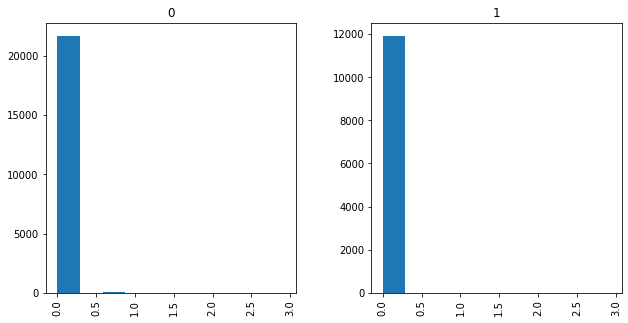

EVENT: ipq_results_prequalification_results___prequalification_results_click_checking_saving_both
(180 outliers removed.)
-----Average-----
 Reached:	0.0
 Not Reached:	0.0
T test p-value: nan


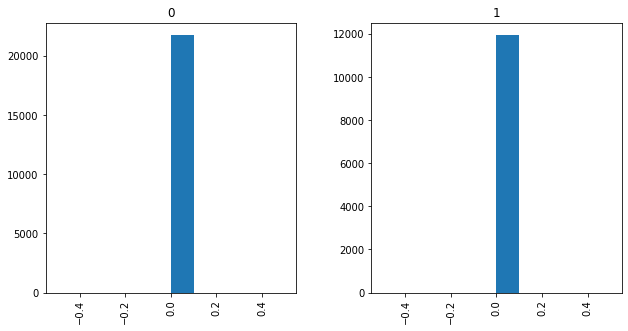

EVENT: ipq_results_prequalification_results___prequalification_results_click_checking_saving_savings
(103 outliers removed.)
-----Average-----
 Reached:	0.0
 Not Reached:	0.0
T test p-value: nan


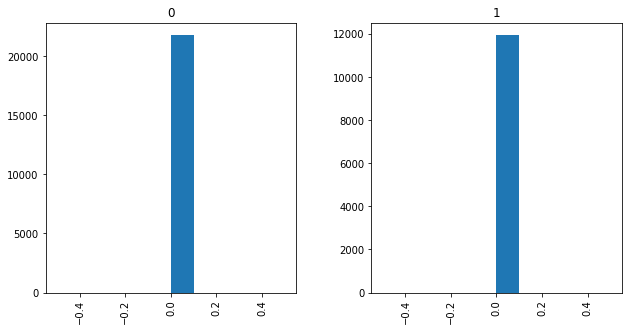

EVENT: ipq_results_prequalification_results___prequalification_results_click_checking_saving_savings_time
(99 outliers removed.)
-----Average-----
 Reached:	0.0
 Not Reached:	0.0
T test p-value: nan


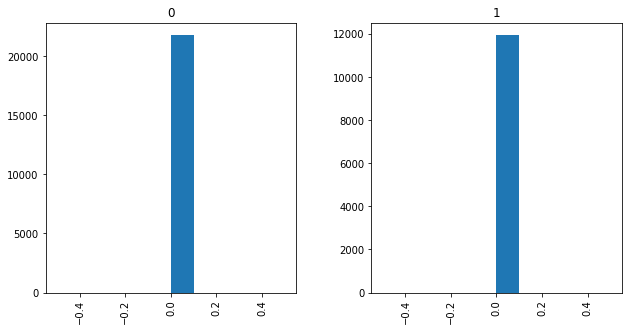

EVENT: ipq_results_prequalification_results___prequalification_results_click_loan_purpose_auto_purchase
(30 outliers removed.)
-----Average-----
 Reached:	0.0
 Not Reached:	0.0
T test p-value: nan


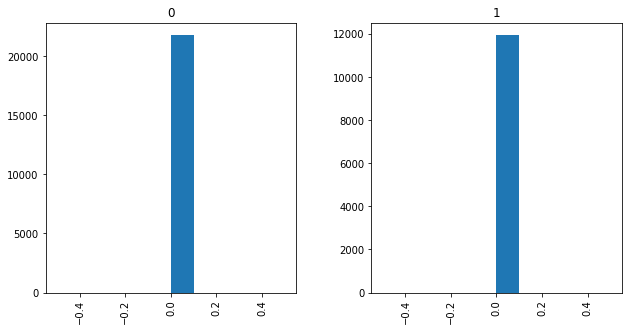

EVENT: ipq_results_prequalification_results___prequalification_results_click_loan_purpose_auto_purchase_time
(29 outliers removed.)
-----Average-----
 Reached:	0.0
 Not Reached:	0.0
T test p-value: nan


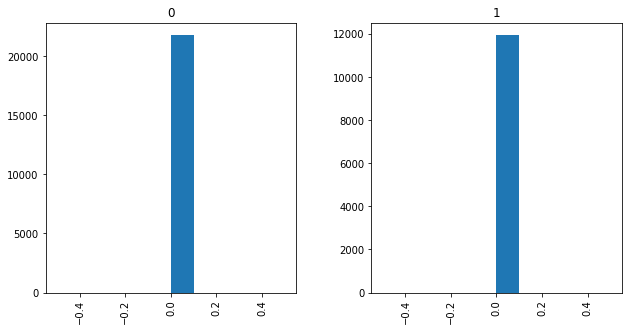

EVENT: ipq_results_prequalification_results___prequalification_results_click_loan_purpose_auto_repair
(64 outliers removed.)
-----Average-----
 Reached:	0.0
 Not Reached:	0.0
T test p-value: nan


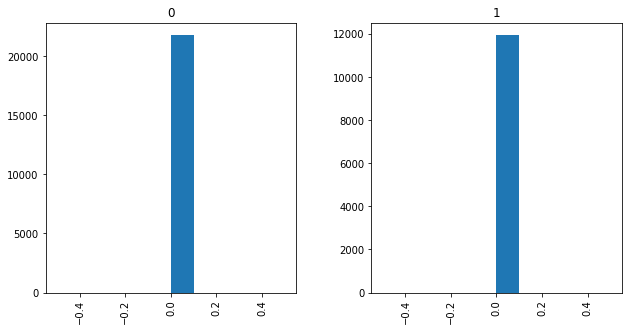

EVENT: ipq_results_prequalification_results___prequalification_results_click_loan_purpose_auto_repair_time
(50 outliers removed.)
-----Average-----
 Reached:	0.0
 Not Reached:	3.953114226614571e-05
T test p-value: 0.17961738049541887


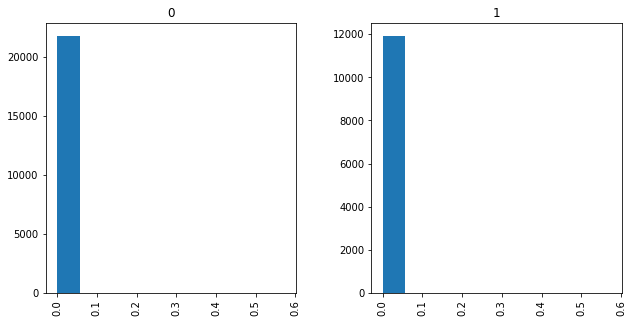

EVENT: ipq_results_prequalification_results___prequalification_results_click_checking_saving_both_time
(25 outliers removed.)
-----Average-----
 Reached:	0.0
 Not Reached:	0.0002509189487226613
T test p-value: 0.0498931659625847


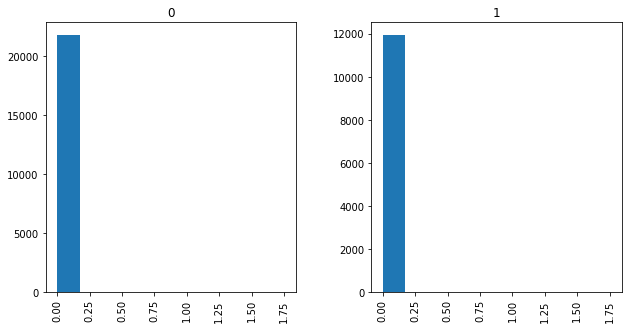

EVENT: landing_page_Others
(0 outliers removed.)
-----Average-----
 Reached:	0.530141695313155
 Not Reached:	0.5201194304088195
T test p-value: 0.07807551209436293


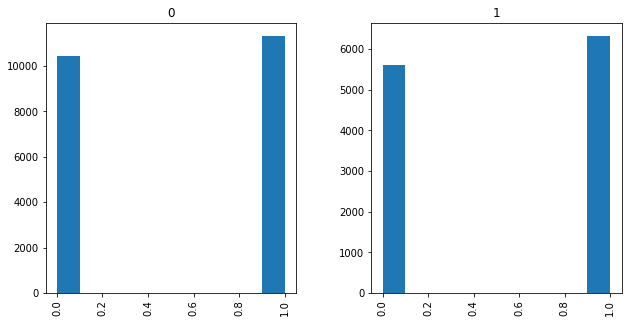

EVENT: landing_page_www.onemainfinancial.com/
(0 outliers removed.)
-----Average-----
 Reached:	0.3417456191833655
 Not Reached:	0.16789159393661002
T test p-value: 1.461488718968728e-254


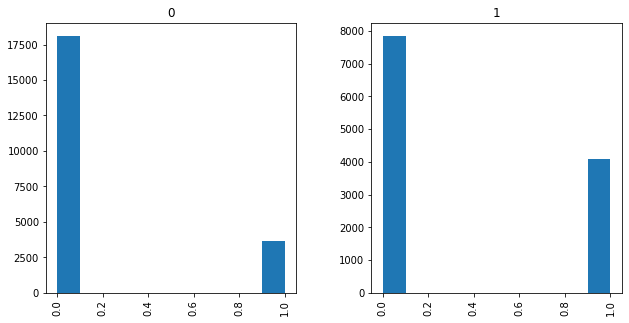

EVENT: landing_page_www.onemainfinancial.com/branches
(3286 outliers removed.)
-----Average-----
 Reached:	0.0
 Not Reached:	0.0
T test p-value: nan


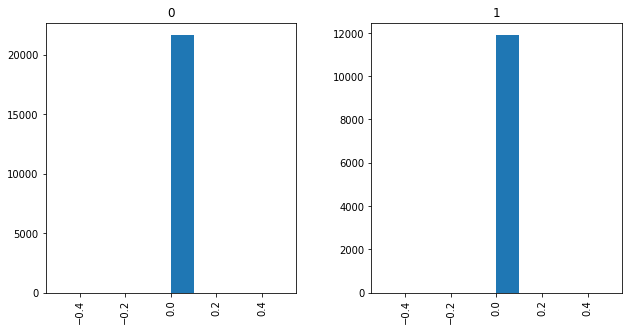

EVENT: landing_page_www.onemainfinancial.com/prequalification
(0 outliers removed.)
-----Average-----
 Reached:	0.1244235767586149
 Not Reached:	0.3045016077170418
T test p-value: 0.0


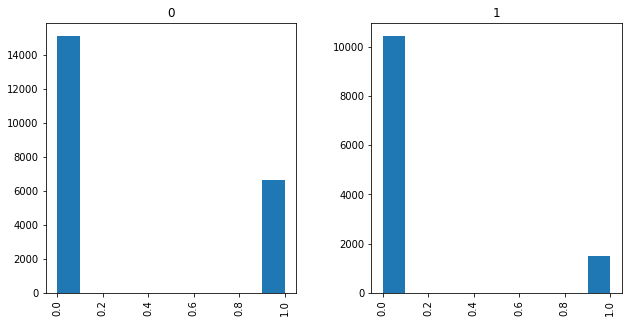

EVENT: platform_generalized_Android
(0 outliers removed.)
-----Average-----
 Reached:	0.27970151756518824
 Not Reached:	0.30229673863114376
T test p-value: 1.177947548624599e-05


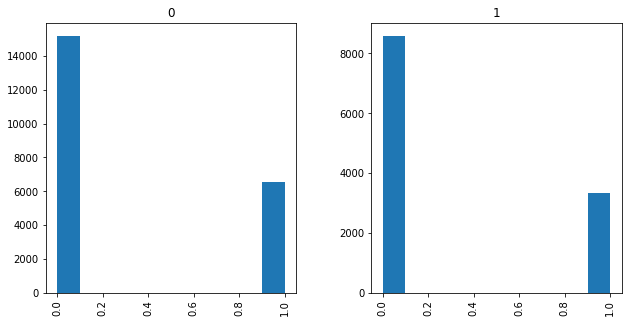

EVENT: platform_generalized_Chrome
(8912 outliers removed.)
-----Average-----
 Reached:	0.0
 Not Reached:	0.0
T test p-value: nan


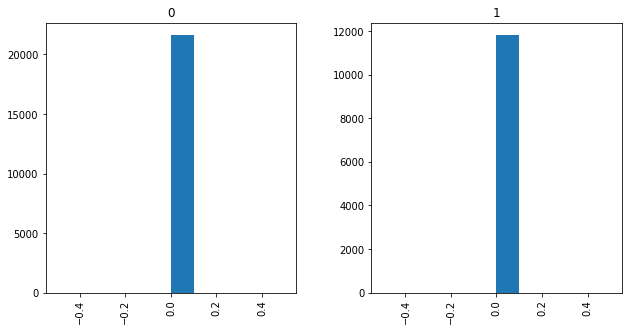

EVENT: platform_generalized_Firefox
(204 outliers removed.)
-----Average-----
 Reached:	0.0
 Not Reached:	0.0
T test p-value: nan


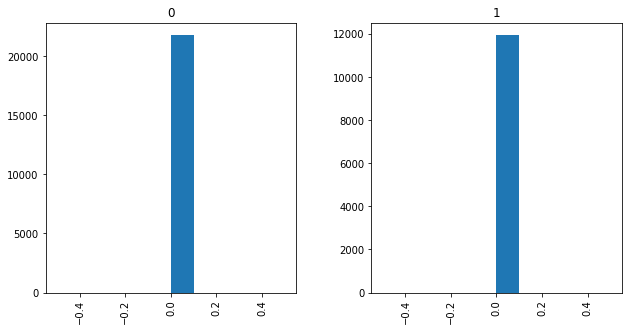

EVENT: platform_generalized_Linux
(845 outliers removed.)
-----Average-----
 Reached:	0.0
 Not Reached:	0.0
T test p-value: nan


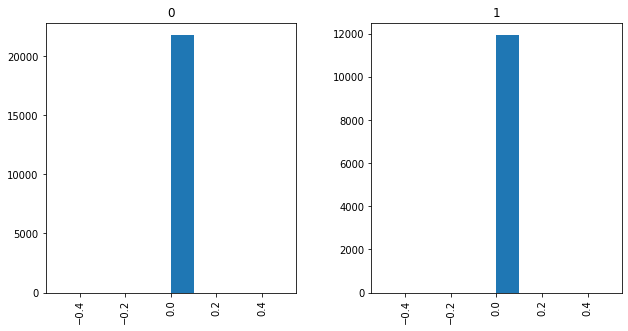

EVENT: platform_generalized_Mac
(35052 outliers removed.)
-----Average-----
 Reached:	0.0
 Not Reached:	0.0
T test p-value: nan


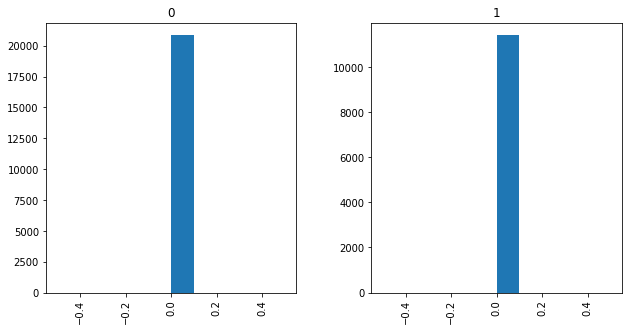

EVENT: platform_generalized_Other
(19 outliers removed.)
-----Average-----
 Reached:	0.0
 Not Reached:	0.0
T test p-value: nan


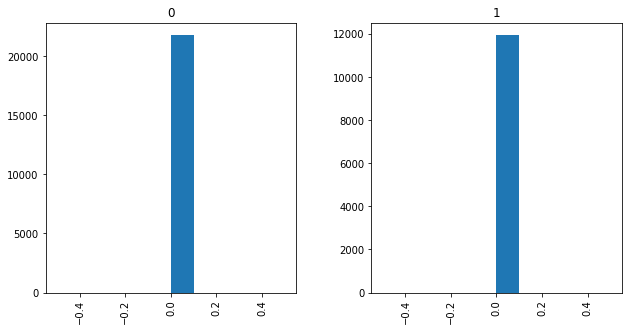

EVENT: platform_generalized_Tizen
(51 outliers removed.)
-----Average-----
 Reached:	0.0
 Not Reached:	0.0
T test p-value: nan


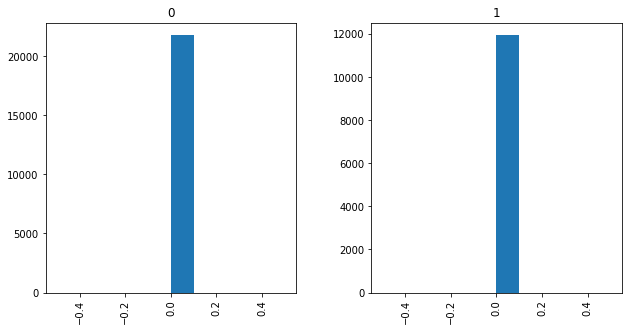

EVENT: platform_generalized_Ubuntu
(66 outliers removed.)
-----Average-----
 Reached:	0.0
 Not Reached:	0.0
T test p-value: nan


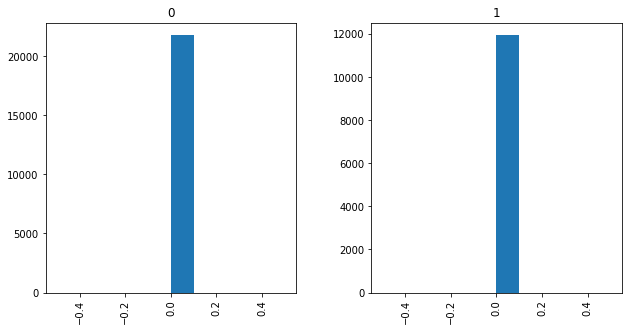

EVENT: platform_generalized_Windows
(0 outliers removed.)
-----Average-----
 Reached:	0.14613901232497695
 Not Reached:	0.1495176848874598
T test p-value: 0.4027446596658425


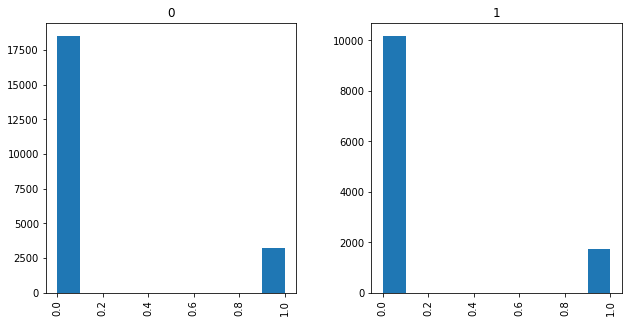

EVENT: platform_generalized_iOS
(0 outliers removed.)
-----Average-----
 Reached:	0.5179844051312149
 Not Reached:	0.49545245751033534
T test p-value: 7.601024026779421e-05


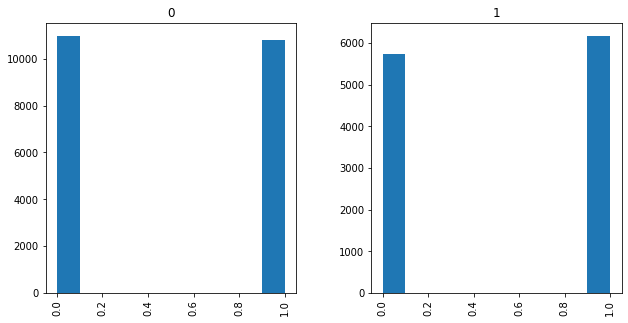

In [17]:
#fig, ax = plt.subplots(26,4, figsize = (12,4))
for the_column in mycol:
    inspect(the_column)
    plt.show()

1. terminate event
2. average for pass/not
3. attribute dist

In [1]:
import config
import pickle
with open(config.MODEL_PATH, 'rb') as file:
    model = pickle.load(file)

In [2]:
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=8, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)